<a href="https://colab.research.google.com/github/15h1k4/Ads-Click-Through-Rate-Prediction/blob/main/Ads_CTR_Prediction_(Classification).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ads Click Through Rate Prediction

**Project Type-** Classification

**By-** Ishika Sarkar

## **Problem Statement**

The aim of this problem is to build a robust classification model that can accurately predict whether an online advertisement will be clicked (Clicked on Ad = 1) or not (Clicked on Ad = 0) by leveraging the available features. These features include user demographics like age, gender, location, and area income, as well as internet usage patterns and the ad topic line. By effectively utilizing these diverse features, the model can uncover patterns and insights that can inform targeted advertising strategies.

The success of the model will be measured by its ability to maximize the overall classification accuracy, as well as achieving high values for relevant metrics such as precision, recall, and F1-score. The model's performance will be evaluated using a held-out test set, simulating real-world conditions.

To solve this problem, we will undertake the following actions:
1. Perform exploratory data analysis to understand the data and identify potential patterns.
2. Preprocess the data, handling missing values, encoding categorical variables, and scaling numerical features as necessary.
3. Split the data into training and testing sets.
4. Implement and train various classification algorithms (e.g., logistic regression, decision trees, random forests) using the training data.
5. Optimize the models' hyperparameters through techniques like cross-validation.
6. Evaluate the trained models on the test set and select the best-performing model based on the chosen metrics.

Accurately predicting whether an advertisement will be clicked or not is crucial for online advertising companies to optimize their ad targeting strategies, improve click-through rates, and maximize return on investment. This problem is directly relevant to enhancing the effectiveness of online advertising campaigns.


## **Library Import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

import datetime as dt
from scipy.stats import norm
from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import warnings
warnings.filterwarnings('ignore')

## **Data Import**

In [2]:
ad= pd.read_csv("/content/ad.csv")

In [3]:
df = ad.copy()

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
0,78.84,30.0,68448.94,161.79,Front-line even-keeled website,Silvaton,Male,Peru,2016-04-04 03:57:48,1
1,60.23,35.0,66815.54,216.24,Front-line fresh-thinking open system,West Jeremyside,Male,Papua New Guinea,2016-06-18 16:02:34,0
2,46.20,49.0,62109.80,135.24,Enhanced maximized access,Lake Vanessa,Male,Chile,2016-06-26 07:01:47,1
3,87.85,31.0,50055.33,134.46,Total zero administration software,Port Sherrystad,Male,French Polynesia,2016-04-18 21:07:28,1
4,64.38,37.0,55121.65,232.54,Devolved regional moderator,South Patrickfort,Female,Bosnia and Herzegovina,2016-07-18 18:33:05,0


In [5]:
df.tail()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
49995,56.64,37.0,64011.26,124.34,Networked stable open architecture,Hatfieldshire,Male,Korea,2016-03-06 23:26:44,1
49996,78.36,42.0,60812.77,145.98,Customizable 6thgeneration knowledge user,Christinehaven,Male,Malta,2016-06-26 07:01:47,1
49997,38.35,33.0,51512.66,226.54,Total cohesive moratorium,Elizabethport,Female,Lebanon,2016-02-17 23:47:00,1
49998,75.84,36.0,50971.73,218.17,Enhanced asymmetric installation,West Steven,Male,Qatar,2016-06-12 11:17:25,1
49999,41.84,41.0,39723.97,156.36,Future-proofed coherent budgetary management,Lake Jose,Female,Lithuania,2016-07-09 11:18:02,1


In [6]:
df.sample(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad
23092,69.11,29.0,56909.30,238.10,Multi-channeled scalable moratorium,Wagnerchester,Female,Djibouti,2016-02-15 16:18:49,0
38018,49.84,22.0,19991.72,132.31,Future-proofed modular utilization,Lisamouth,Female,Svalbard & Jan Mayen Islands,2016-03-15 14:33:12,0
13317,44.72,39.0,58151.87,134.46,Organized static focus group,East Tylershire,Male,Czech Republic,2016-04-22 20:32:17,1
41762,47.66,42.0,60575.99,109.98,Monitored 24/7 moratorium,New Williammouth,Female,Chad,2016-06-10 10:11:00,1
294,71.90,28.0,38067.08,218.17,Function-based fault-tolerant model,Melanieton,Female,Cyprus,2016-01-22 12:58:14,0


## **Data Inspection**

In [7]:
df.shape

(50000, 10)

In [8]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Gender', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  50000 non-null  float64
 1   Age                       50000 non-null  float64
 2   Area Income               50000 non-null  float64
 3   Daily Internet Usage      50000 non-null  float64
 4   Ad Topic Line             50000 non-null  object 
 5   City                      50000 non-null  object 
 6   Gender                    50000 non-null  object 
 7   Country                   50000 non-null  object 
 8   Timestamp                 50000 non-null  object 
 9   Clicked on Ad             50000 non-null  int64  
dtypes: float64(4), int64(1), object(5)
memory usage: 3.8+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,50000.0,64.133188,14.842587,32.60,49.84,66.63,76.44,91.37
Age,50000.0,35.835400,8.865057,19.00,29.00,34.00,41.00,60.00
Area Income,50000.0,53927.726446,11413.630035,13996.50,47575.44,55993.68,63100.13,79332.33
Daily Internet Usage,50000.0,174.776637,42.023941,104.78,136.18,167.86,213.75,269.96
Clicked on Ad,50000.0,0.497640,0.499999,0.00,0.00,0.00,1.00,1.00


In [11]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Gender                      0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

**Observations**
*  *Dataset having 50000 observations and 10 columns.*

*   *In the dataset, there are object, float64, and int64 dtypes features present.*

* *There are no null/missing values in the dataset.*




##**Understanding Variables**

In [12]:
cf = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(cf)))
print(cf)

There are 5 categorical variables
['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp']


In [13]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

In [14]:
cf

['Ad Topic Line', 'City', 'Gender', 'Country', 'Timestamp']

In [15]:
nv=[var for var in df.columns if var not in cf]
print('There are {} numerical features'.format(len(nv)))
print(nv)

There are 5 numerical features
['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Clicked on Ad']


In [16]:
nv.remove('Clicked on Ad')
print(nv)

['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage']


In [17]:
for var in df.columns:
    print(df[var].value_counts())

Daily Time Spent on Site
75.84    1237
79.53    1235
84.53    1235
66.01    1162
48.73    1148
         ... 
56.39       1
43.57       1
74.07       1
44.98       1
40.01       1
Name: count, Length: 600, dtype: int64
Age
31.0    3732
34.0    2473
28.0    2367
36.0    2294
39.0    2188
29.0    2130
33.0    2118
26.0    2090
32.0    2049
30.0    2031
35.0    1922
38.0    1806
37.0    1713
45.0    1562
40.0    1538
25.0    1533
41.0    1377
43.0    1326
50.0    1241
53.0    1178
49.0    1119
42.0    1035
24.0    1030
27.0    1010
21.0     966
44.0     907
23.0     890
60.0     846
52.0     709
22.0     690
46.0     587
48.0     463
57.0     420
51.0     291
54.0     137
20.0     117
58.0     100
47.0      12
19.0       3
Name: count, dtype: int64
Area Income
52340.10    2402
63102.19    2103
46239.14    1324
38067.08    1211
56884.74    1179
            ... 
59784.18       1
70783.94       1
59243.46       1
57518.73       1
56113.37       1
Name: count, Length: 655, dtype: int64
Daily I

In [18]:
df['Ad Topic Line'].value_counts().head(10)

Ad Topic Line
Decentralized client-driven data-warehouse    2375
Function-based fault-tolerant model           2085
Advanced disintermediate data-warehouse       1749
Polarized 5thgeneration matrix                1651
Seamless optimal contingency                  1440
Stand-alone explicit orchestration            1191
Persistent fault-tolerant service-desk        1012
Pre-emptive well-modulated moderator           994
Open-source scalable protocol                  987
Realigned zero tolerance emulation             751
Name: count, dtype: int64

In [19]:
df['Ad Topic Line'].nunique()

677

In [20]:
df['City'].value_counts().head(10)

City
Williamsside        1753
New Williammouth    1347
Bakerhaven          1189
Shelbyport          1137
West Jeremyside     1094
New Angelview        964
Wagnerchester        797
Kylieview            769
Lake Kurtmouth       767
Youngfort            649
Name: count, dtype: int64

In [21]:
df['Country'].value_counts().head(10)

Country
Peru            2432
Australia       1843
El Salvador     1433
Jersey          1314
Niger           1299
Cuba            1247
Burkina Faso    1222
Saudi Arabia    1160
Mayotte          972
Chad             893
Name: count, dtype: int64

In [22]:
df['Clicked on Ad'].value_counts().head(10)

Clicked on Ad
0    25118
1    24882
Name: count, dtype: int64

## **Data Wrangling and Feature Engineering**

__________________________________________________________________________________________


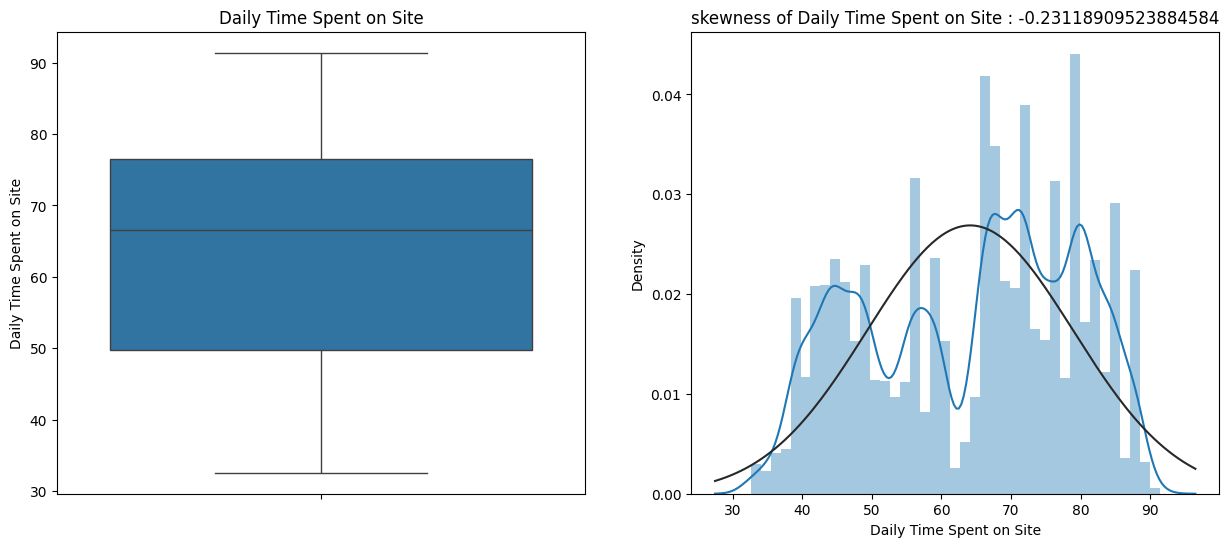

__________________________________________________________________________________________


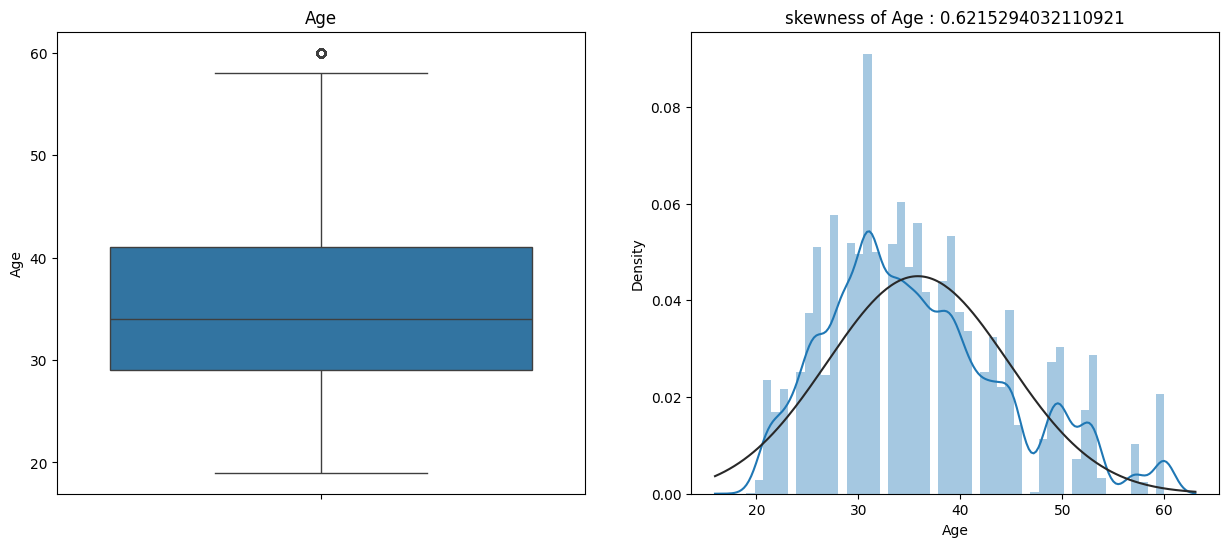

__________________________________________________________________________________________


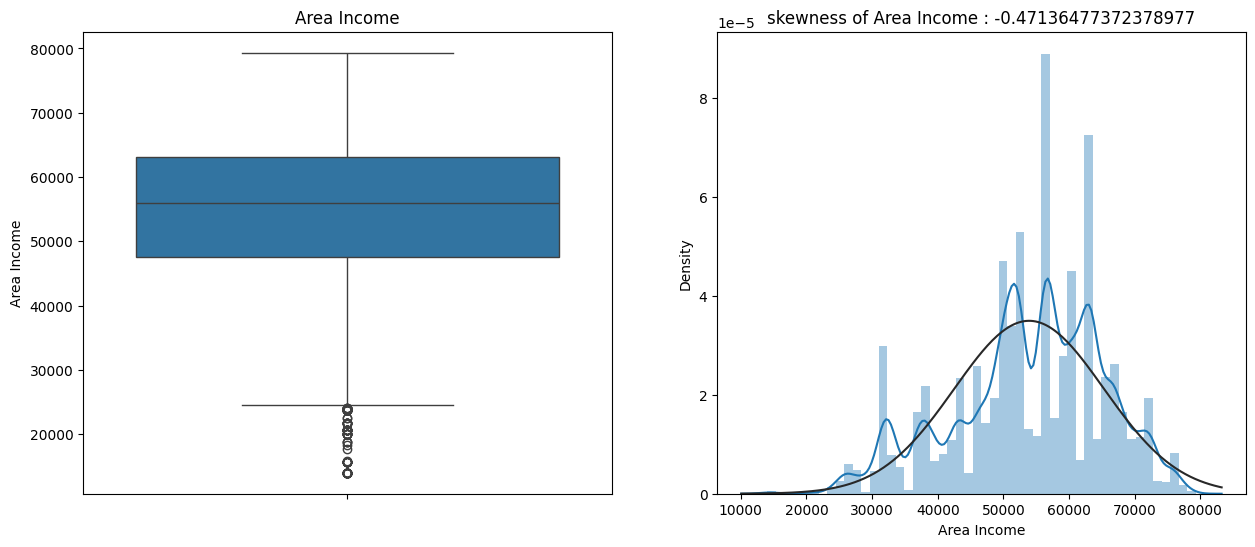

__________________________________________________________________________________________


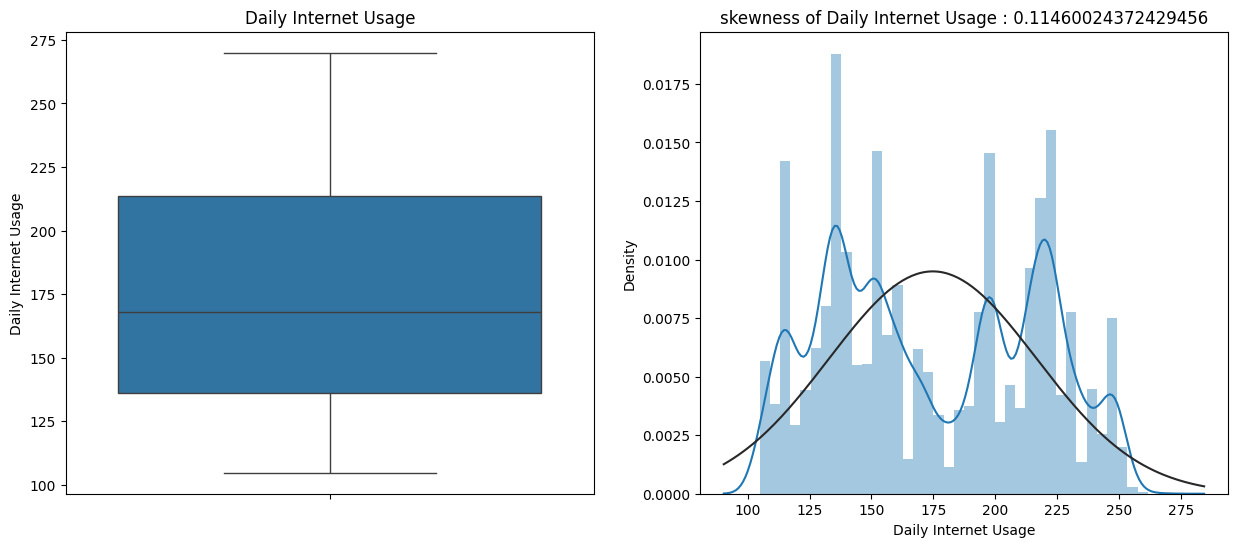

In [23]:
# Checking for outliers in numerical variables using boxplot
for var in nv:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

In [24]:
# Using Inter Quartile Range for removing outliers from numerical variables

# Defining outlier features but remove flat IQR feature pdays and previous
outlier_var=['Age', 'Area Income']

# Capping dataset
for i in outlier_var:
    # Findling IQR
    Q1=df[i].quantile(0.25)
    Q3=df[i].quantile(0.75)
    IQR=Q3-Q1

    # Defining upper and lower limit
    lower_limit =df[i].quantile(0.25)-1.5*IQR
    upper_limit =df[i].quantile(0.75)+1.5*IQR

    # Applying lower and upper limit to each variables
    df.loc[(df[i] > upper_limit),i] = upper_limit
    df.loc[(df[i] < lower_limit),i] = lower_limit

__________________________________________________________________________________________


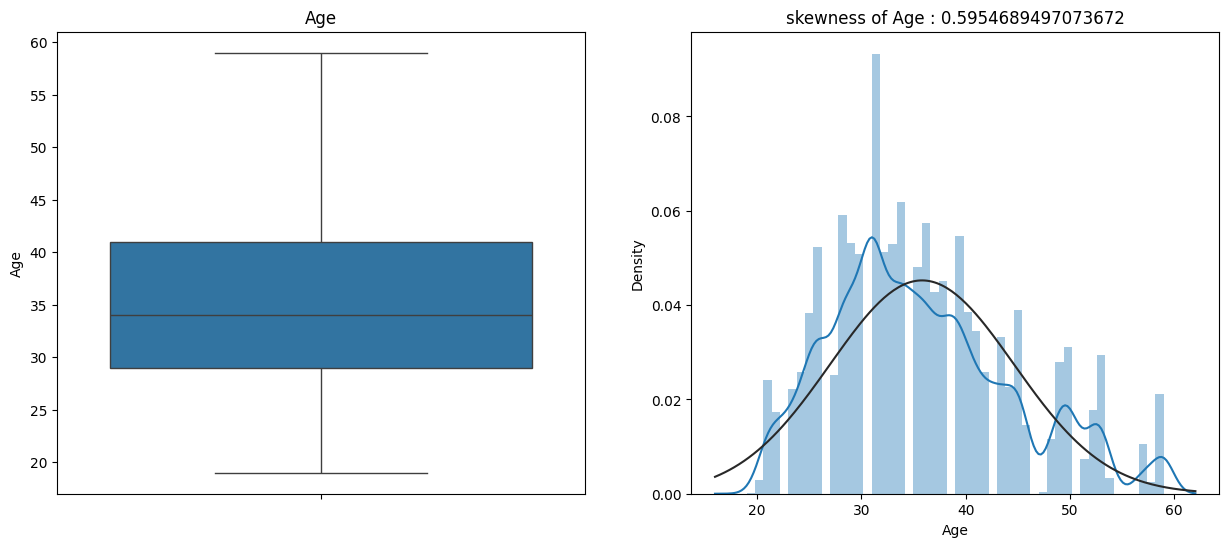

__________________________________________________________________________________________


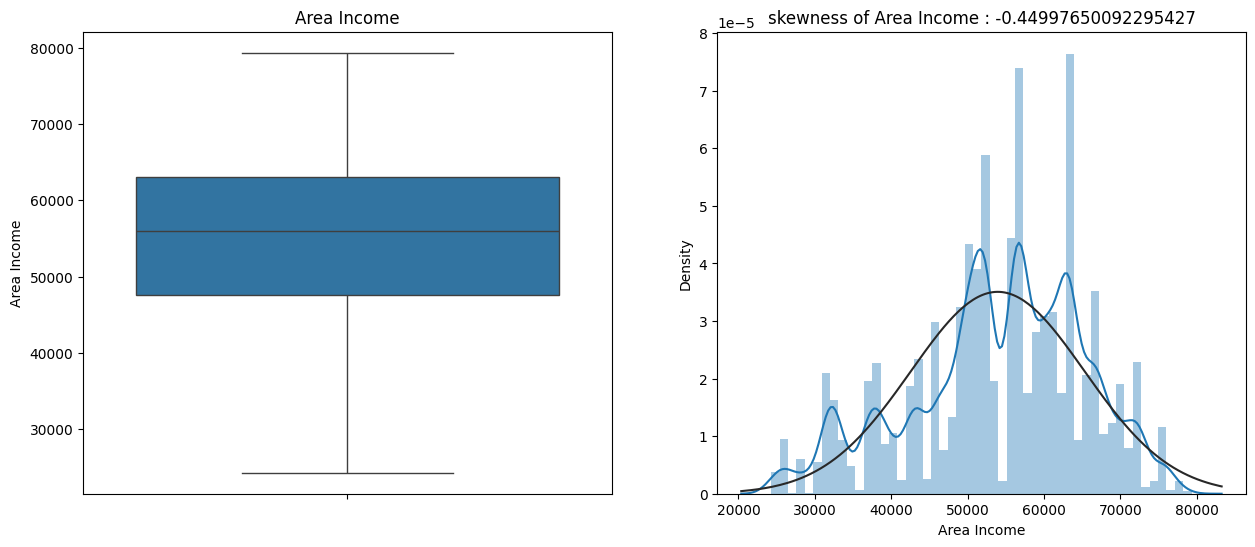

In [25]:
# Using boxplot checking outliers in features after removed using IQR

for var in outlier_var:
    plt.figure(figsize=(15,6))
    plt.subplot(1,2,1)
    ax=sns.boxplot(data=df[var])
    ax.set_title(f'{var}')
    ax.set_ylabel(var)

    plt.subplot(1,2,2)
    ax=sns.distplot(df[var], fit=norm)
    ax.set_title(f'skewness of {var} : {df[var].skew()}')
    ax.set_xlabel(var)
    print('__'*45)
    plt.show()

*Outliers are treated using the interquartile range for the variables Age and Area Income.*

## **EDA**

### **User Demographic Insights**

1. Understanding which age groups are more likely to click on ads can help tailor ad content and target specific age demographics.

2. Analyzing differences in ad click behavior between genders can guide gender-specific marketing strategies.

3. Insights into which cities or countries have higher ad click-through rates can help in geo-targeting ads effectively.

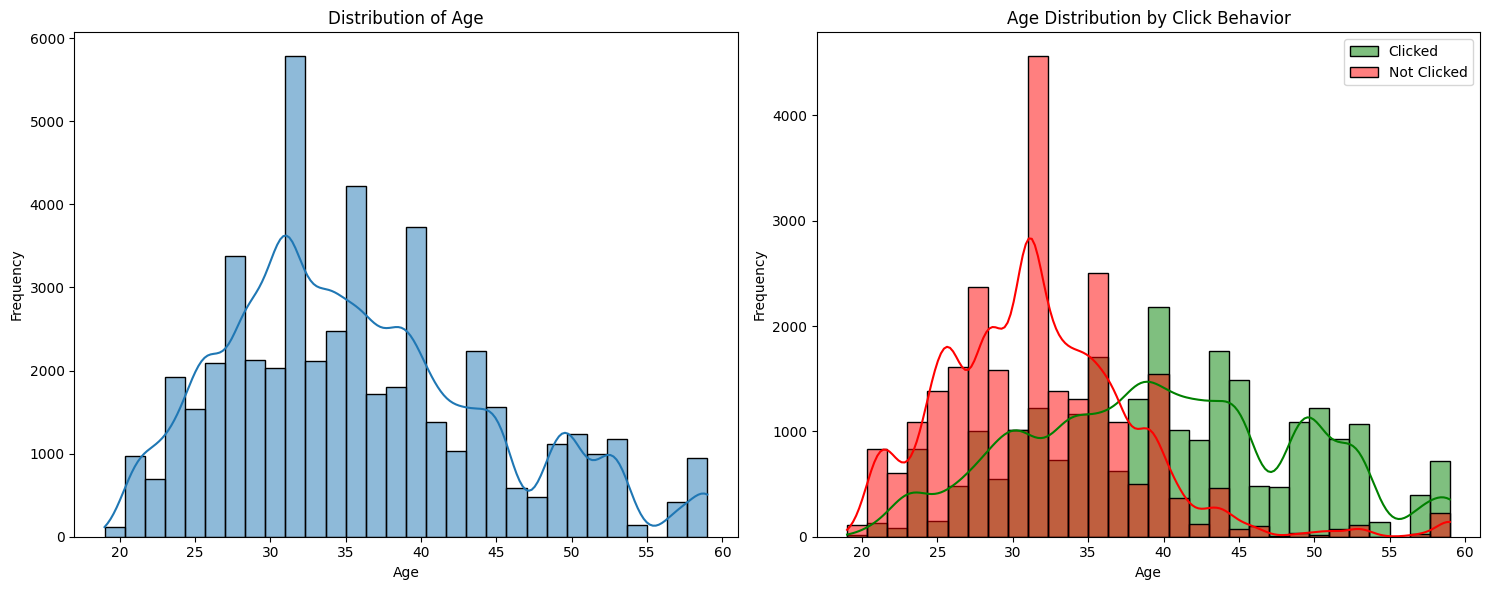

In [26]:
# Distribution of Age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

sns.histplot(df['Age'], bins=30, kde=True, ax=ax1)
ax1.set_title('Distribution of Age')
ax1.set_xlabel('Age')
ax1.set_ylabel('Frequency')

# Clicks by Age
sns.histplot(df[df['Clicked on Ad'] == 1]['Age'], bins=30, kde=True, color='green', label='Clicked', ax=ax2)
sns.histplot(df[df['Clicked on Ad'] == 0]['Age'], bins=30, kde=True, color='red', label='Not Clicked', ax=ax2)
ax2.set_title('Age Distribution by Click Behavior')
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.show()

* *The overall age distribution appears to be skewed towards younger age groups, with a peak around 25-35 years old. This suggests that the target audience or user base for the online advertisements tends to be younger adults.*

*   *The "Not Clicked" distribution closely mirrors the overall age distribution, with a peak around 25-35 years old.*

* *The "Clicked" distribution shows a different pattern, with a more even distribution across different age groups, particularly among older ages (40s and 50s).*

* *This observation suggests that older users might be more likely to click on advertisements compared to younger users, despite being a smaller portion of the overall user base.*

* *There appears to be a peak in the "Clicked" distribution around the age of 35-40. This could indicate that users in this age range tend to be more responsive to online advertisements or have a higher propensity to click on ads.*


#### Analyzing differences in ad click behavior between genders can guide gender-specific marketing strategies.

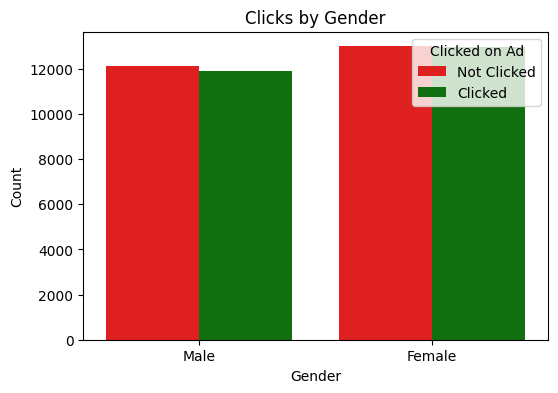

In [27]:
plt.figure(figsize=(6, 4))
ax = sns.countplot(data=df, x='Gender', hue='Clicked on Ad', palette=['red', 'green'])
plt.title('Clicks by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Clicked on Ad', labels=['Not Clicked', 'Clicked'])
plt.show()

In [28]:
# Create a contingency table
contingency_table = pd.crosstab(df['Gender'], df['Clicked on Ad'])

# Perform the chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print("Chi-Square Statistic:", chi2)
print("P-value:", p)
print("Degrees of Freedom:", dof)
print("Expected Frequencies Table:\n", expected)

# Interpret the result
alpha = 0.05
if p < alpha:
    print("There is a significant association between Gender and Clicked on Ad.")
else:
    print("There is no significant association between Gender and Clicked on Ad.")

Chi-Square Statistic: 1.0717573098777333
P-value: 0.3005488482623946
Degrees of Freedom: 1
Expected Frequencies Table:
 [[13054.32696 12931.67304]
 [12063.67304 11950.32696]]
There is no significant association between Gender and Clicked on Ad.


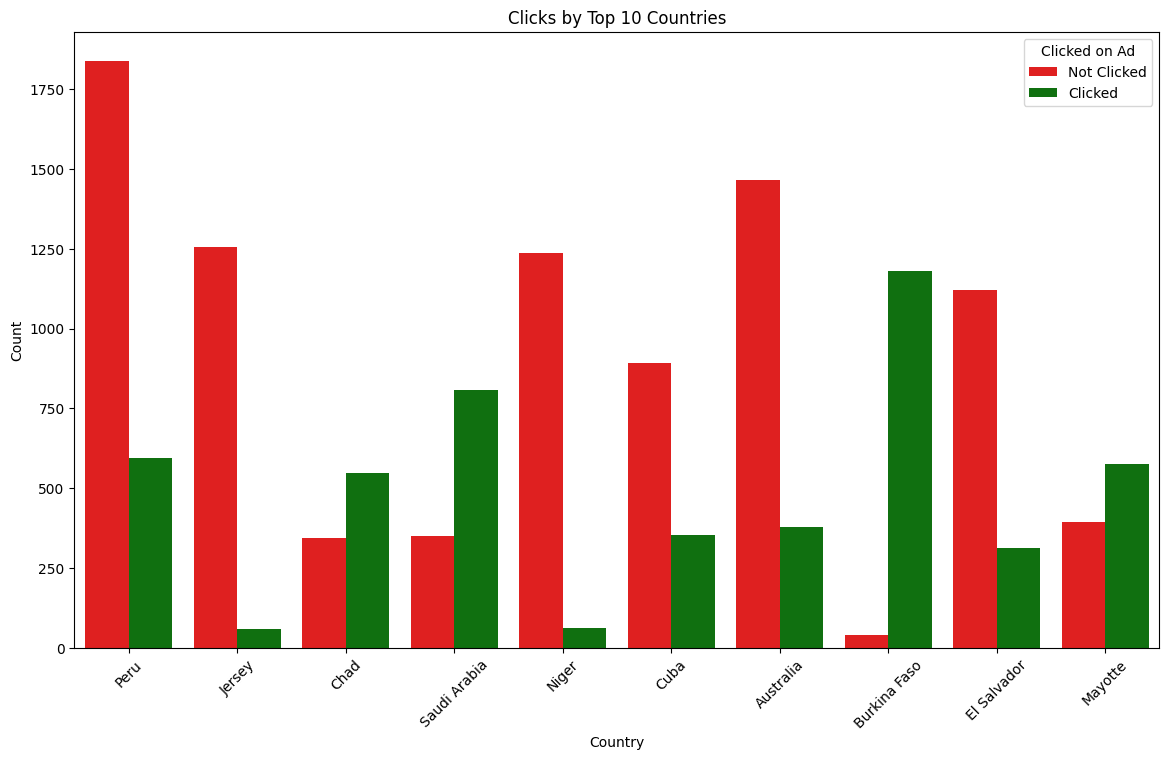

In [29]:
top_countries = df['Country'].value_counts().nlargest(10).index
df_top_countries = df[df['Country'].isin(top_countries)]

plt.figure(figsize=(14, 8))
sns.countplot(data=df_top_countries, x='Country', hue='Clicked on Ad',palette=['red', 'green'])
plt.title('Clicks by Top 10 Countries')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Clicked on Ad', labels=['Not Clicked', 'Clicked'])
plt.show()

*Burkina Faso and Saudi Arabia have highest number of users who have clicked on the ad*

### **Behavioral Insights**

1. How the amount of time users spend on the website affects their likelihood to click on ads can help in optimizing ad placement and timing.

2. How general internet usage patterns correlate with ad clicks can guide the timing and frequency of ad displays.

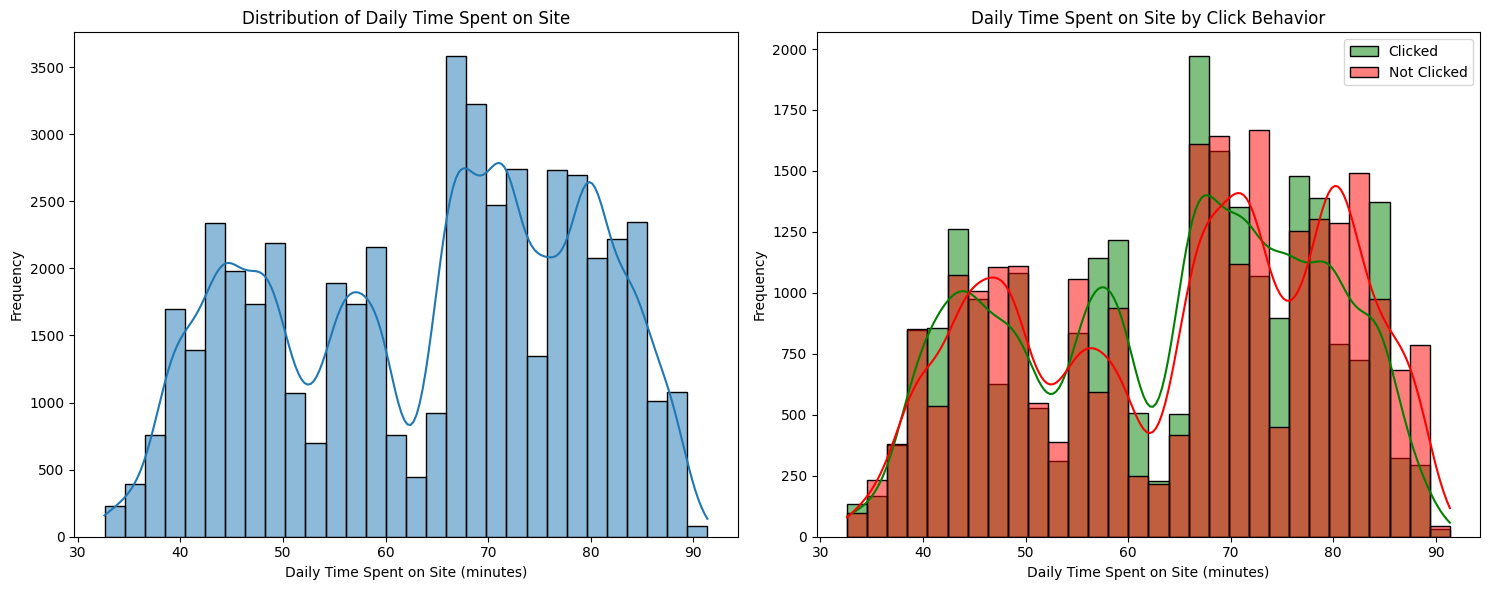

In [30]:
# Distribution of Daily Time Spent on Site
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # Create 1 row, 2 columns

sns.histplot(df['Daily Time Spent on Site'], bins=30, kde=True, ax=ax1)  # Plot on first subplot
ax1.set_title('Distribution of Daily Time Spent on Site')
ax1.set_xlabel('Daily Time Spent on Site (minutes)')
ax1.set_ylabel('Frequency')

# Clicks by Daily Time Spent on Site
sns.histplot(df[df['Clicked on Ad'] == 1]['Daily Time Spent on Site'], bins=30, kde=True, color='green', label='Clicked', ax=ax2)
sns.histplot(df[df['Clicked on Ad'] == 0]['Daily Time Spent on Site'], bins=30, kde=True, color='red', label='Not Clicked', ax=ax2)
ax2.set_title('Daily Time Spent on Site by Click Behavior')
ax2.set_xlabel('Daily Time Spent on Site (minutes)')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()  # Adjust spacing between plots
plt.show()

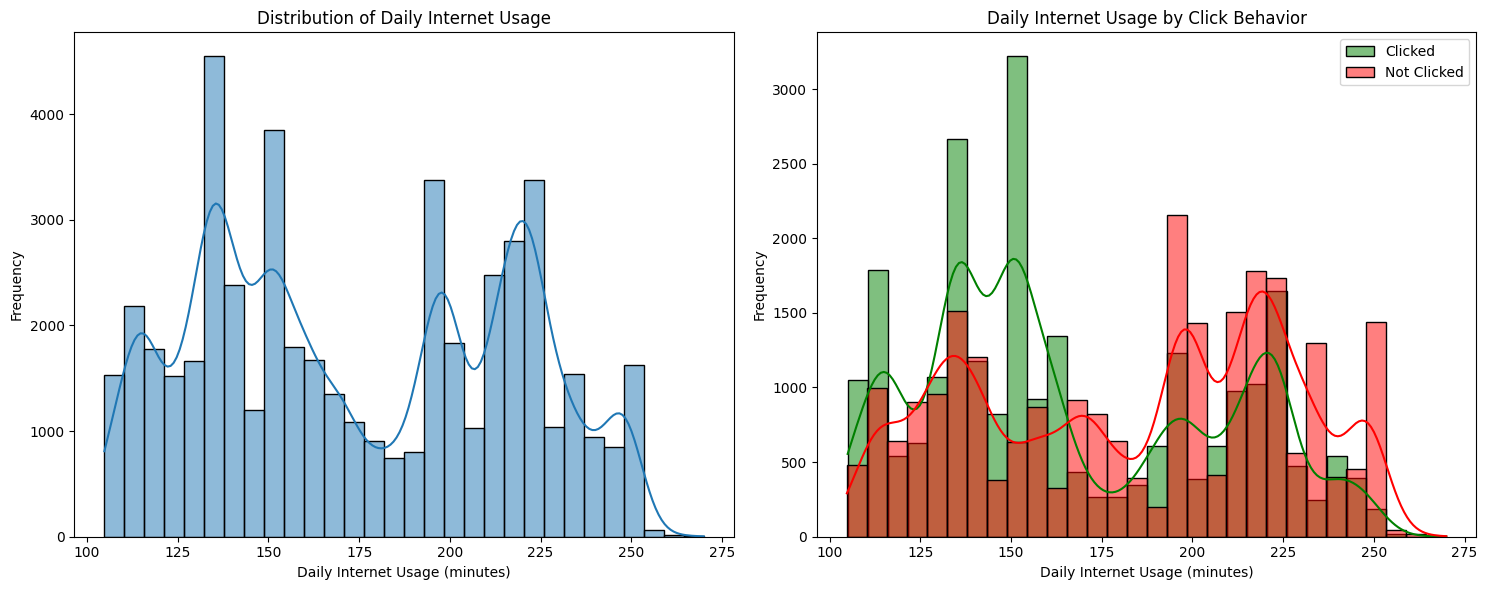

In [31]:
# Distribution of Daily Internet Usage
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))  # Create 1 row, 2 columns

sns.histplot(df['Daily Internet Usage'], bins=30, kde=True, ax=ax1)  # Plot on first subplot
ax1.set_title('Distribution of Daily Internet Usage')
ax1.set_xlabel('Daily Internet Usage (minutes)')
ax1.set_ylabel('Frequency')

# Clicks by Daily Internet Usage
sns.histplot(df[df['Clicked on Ad'] == 1]['Daily Internet Usage'], bins=30, kde=True, color='green', label='Clicked', ax=ax2)
sns.histplot(df[df['Clicked on Ad'] == 0]['Daily Internet Usage'], bins=30, kde=True, color='red', label='Not Clicked', ax=ax2)
ax2.set_title('Daily Internet Usage by Click Behavior')
ax2.set_xlabel('Daily Internet Usage (minutes)')
ax2.set_ylabel('Frequency')
ax2.legend()

plt.tight_layout()
plt.show()

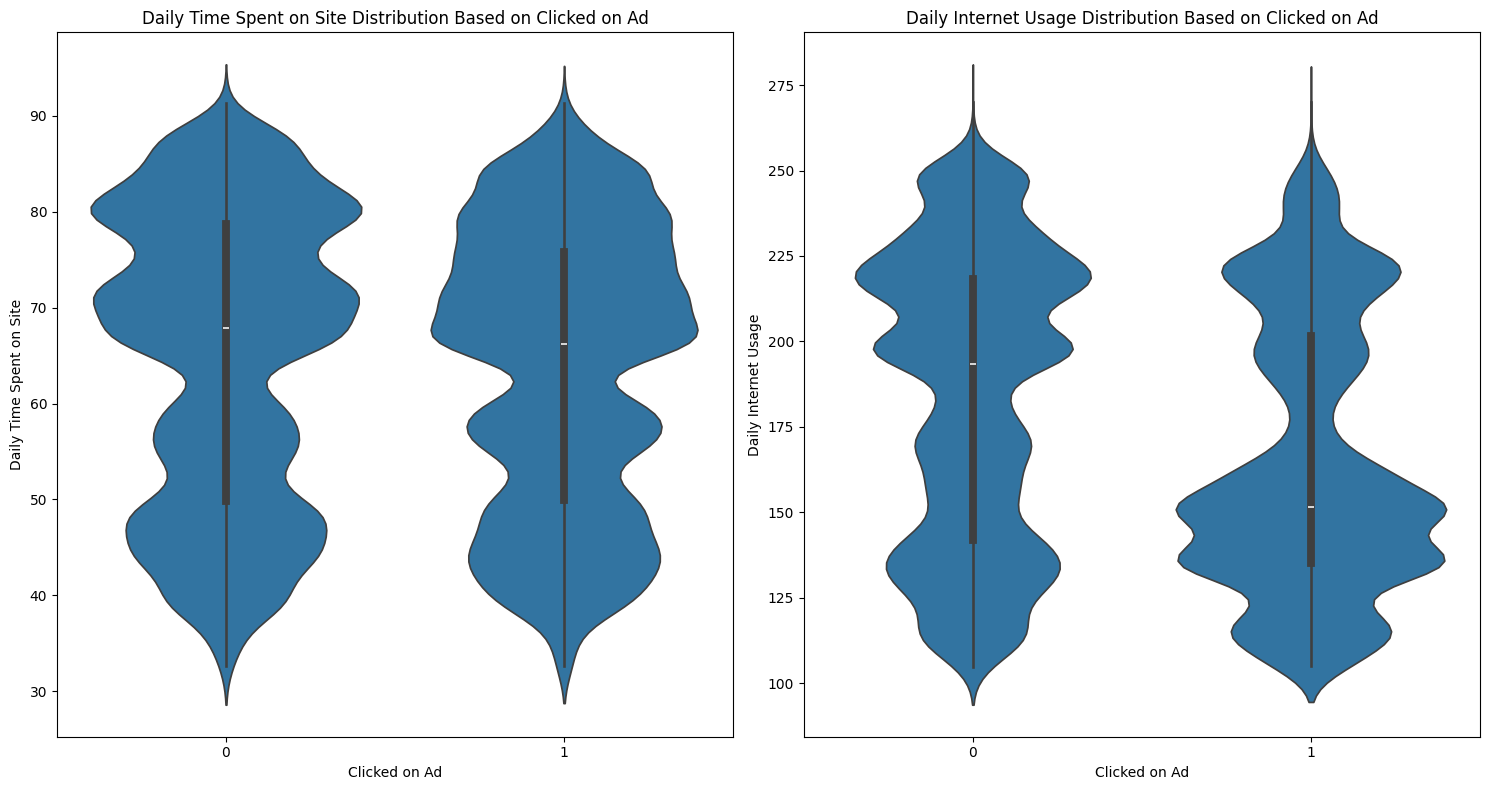

In [32]:
# Create two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Daily Time Spent on Site Distribution Based on Clicked on Ad
sns.violinplot(data=df, y='Daily Time Spent on Site', x='Clicked on Ad', orient='v', ax=axes[0])
axes[0].set_title("Daily Time Spent on Site Distribution Based on Clicked on Ad")

# Daily Internet Usage Distribution Based on Clicked on Ad
sns.violinplot(data=df, y='Daily Internet Usage', x='Clicked on Ad', orient='v', ax=axes[1])
axes[1].set_title("Daily Internet Usage Distribution Based on Clicked on Ad")

plt.tight_layout()
plt.show()

**Daily Time Spent on Site**

*   *Users who spend longer sessions on the site (e.g., 70-80 minutes) appear to have a higher likelihood of clicking on advertisements compared to those with shorter sessions. This could suggest that longer engagement or browsing time increases the chances of ad clicks.*

*   *Users who spend very short sessions (e.g., 30-40 minutes) on the site seem to have a lower propensity to click on ads. These users may be more focused on specific tasks or have a shorter attention span, making them less receptive to advertisements.*

* ***Based on the observed patterns, online advertising companies could consider adjusting the timing or placement of advertisements based on the user's session duration. For instance, ads might be more effective when displayed after a certain threshold of time spent on the site or during specific time intervals.***


**Daily Internet Usage**
* *The "Clicked" distribution shows a higher concentration around lower internet usage times (100-150 minutes), suggesting users who spend less time on the internet are more likely to click on advertisements.*

* *The "Not Clicked" distribution exhibits higher frequencies at higher internet usage times (200-250 minutes), implying that users who spend more time on the internet tend to be less likely to click on advertisements.*

### **Ad Content Insights**

Analyzing which types of ad topic lines are more successful can inform creative strategies for ad content, leading to higher engagement rates.

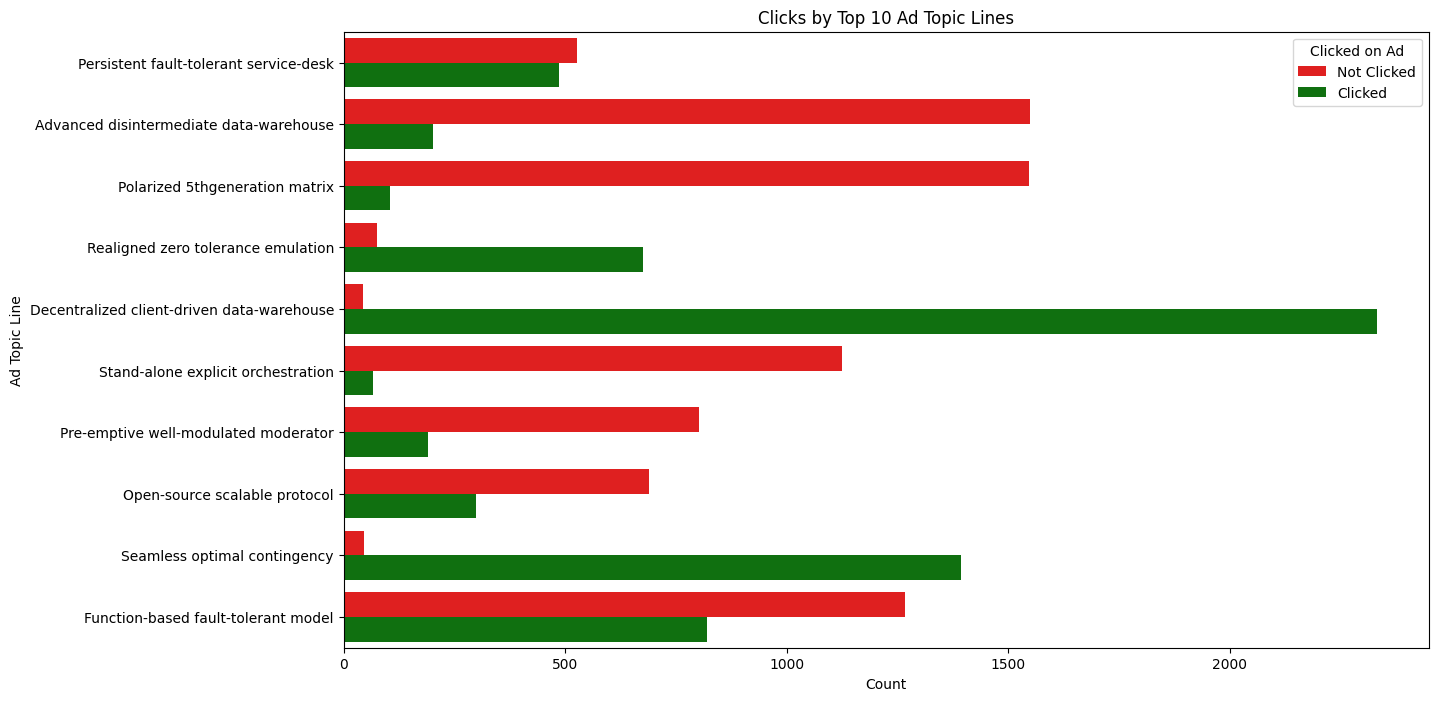

In [33]:
# Top 10 Ad Topics by Click Rate
top_ad_topics = df['Ad Topic Line'].value_counts().nlargest(10).index
df_top_ad_topics = df[df['Ad Topic Line'].isin(top_ad_topics)]

plt.figure(figsize=(14, 8))
sns.countplot(data=df_top_ad_topics, y='Ad Topic Line', hue='Clicked on Ad',palette=['red', 'green'])
plt.title('Clicks by Top 10 Ad Topic Lines')
plt.xlabel('Count')
plt.ylabel('Ad Topic Line')
plt.legend(title='Clicked on Ad', labels=['Not Clicked', 'Clicked'])
plt.show()

*Topics like "Decentralized client-driven data-warehouse," "Seamless optimal contingency," and "Realigned zero tolerance emulation" appear to have higher click-through rates compared to others.*

In [34]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [35]:
# Text preprocessing function
def preprocess_text(text):
    # Tokenize
    words = word_tokenize(text)
    # Convert to lower case
    words = [word.lower() for word in words]
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.isalnum() and word not in stop_words]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

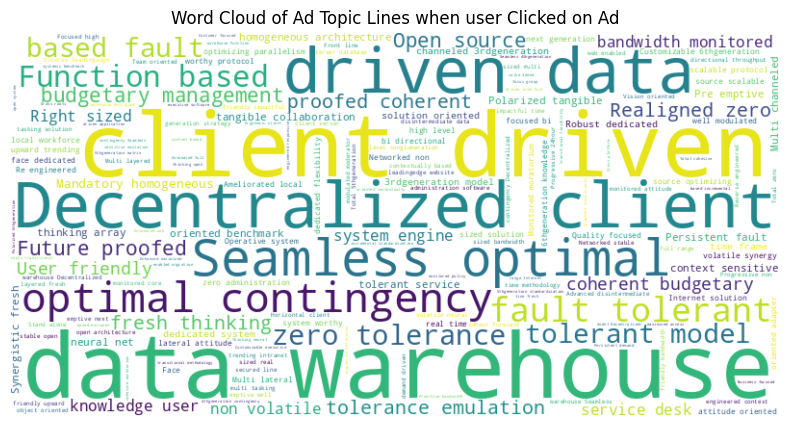

In [36]:
# Apply text preprocessing
df['cleaned_ad_topic'] = df['Ad Topic Line'].apply(preprocess_text)

# Filter rows where 'Clicked on Ad' is equal to 1
clicked_df = df[df['Clicked on Ad'] == 1]

# Combine all cleaned text into one large string
clicked_combined_text = ' '.join(clicked_df['Ad Topic Line'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(clicked_combined_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hide the axes
plt.title('Word Cloud of Ad Topic Lines when user Clicked on Ad')
plt.show()

* *Users seem to be particularly interested in ad messages that emphasize fault tolerance, robust systems, client-centricity, and user experience. This suggests a target audience prioritizing reliability, performance, and solutions that cater to their needs.*

* *The prevalence of data-related terms like "data warehouse," "data-driven," and "budgetary management" indicates user interest in solutions that leverage data analytics for decision-making and optimization.*

* *The presence of "decentralized" suggests potential user interest in modern architectures or scalable solutions.*

* *Users seem to be drawn to ad messages that promise optimal, right-sized solutions, implying a value proposition focused on efficiency and avoiding overspending.*

### **Temporal Insights**

Understanding when users are more likely to click on ads can optimize ad scheduling. Certain times of the day or days of the week may show higher click-through rates.

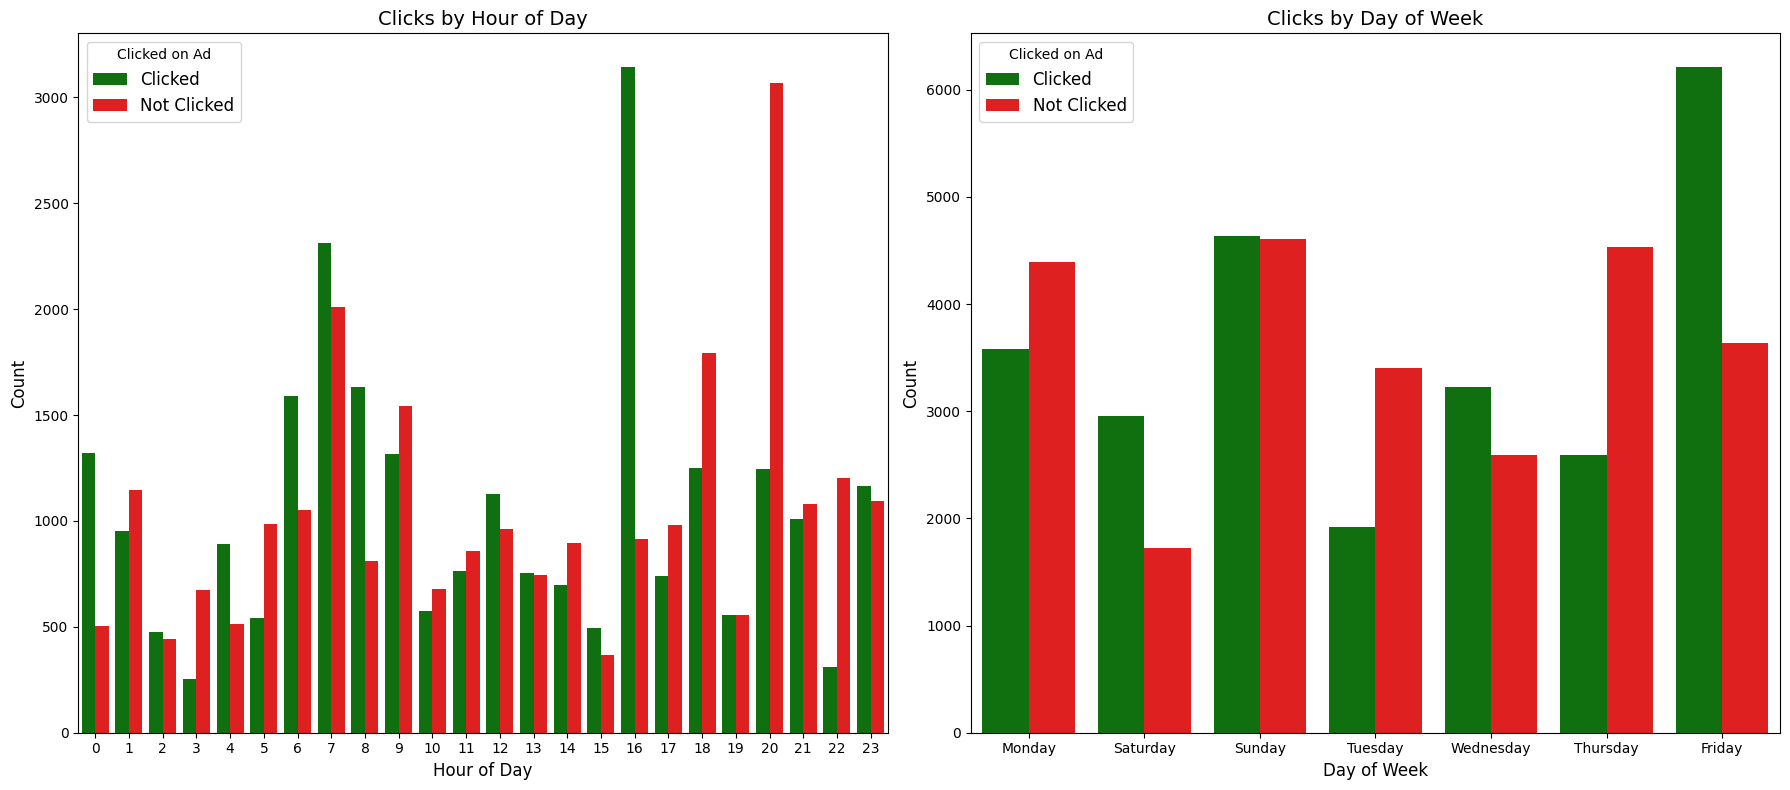

In [37]:
# Extract hour and day of the week from Timestamp
df['Hour'] = df['Timestamp'].dt.hour
df['Day of Week'] = df['Timestamp'].dt.dayofweek
df['Day Name'] = df['Timestamp'].dt.day_name()

# Clicks by Hour of Day and Day of Week (side-by-side)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))  # Create 1 row, 2 columns

# Clicks by Hour
sns.countplot(data=df, x='Hour', hue='Clicked on Ad', palette=['green', 'red'], ax=ax1)  # Set custom palette
ax1.set_title('Clicks by Hour of Day', fontsize=14)  # Adjust font size for larger figure
ax1.set_xlabel('Hour of Day', fontsize=12)  # Adjust font size
ax1.set_ylabel('Count', fontsize=12)
ax1.legend(title='Clicked on Ad', labels=['Clicked', 'Not Clicked'], fontsize=12)  # Set custom legend labels

# Clicks by Day of Week
sns.countplot(data=df, x='Day Name', hue='Clicked on Ad', palette=['green', 'red'], ax=ax2)
ax2.set_title('Clicks by Day of Week', fontsize=14)
ax2.set_xlabel('Day of Week', fontsize=12)
ax2.set_ylabel('Count', fontsize=12)
ax2.legend(title='Clicked on Ad', labels=['Clicked', 'Not Clicked'], fontsize=12)

plt.tight_layout()  # Adjust spacing between plots
plt.show()

* There is a gradual increase in ad clicks from the morning hours until the first peak at 7 AM, followed by a slight dip and then another gradual increase until the evening peak at 4 PM. After the evening peak, the number of clicks gradually decreases towards the late night hours.
* Friday appears to be the day with the highest number of ad clicks, suggesting that users are most engaged and receptive to advertisements towards the end of the workweek.

In [38]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Gender,Country,Timestamp,Clicked on Ad,cleaned_ad_topic,Hour,Day of Week,Day Name
0,78.84,30.0,68448.94,161.79,Front-line even-keeled website,Silvaton,Male,Peru,2016-04-04 03:57:48,1,website,3,0,Monday
1,60.23,35.0,66815.54,216.24,Front-line fresh-thinking open system,West Jeremyside,Male,Papua New Guinea,2016-06-18 16:02:34,0,open system,16,5,Saturday
2,46.20,49.0,62109.80,135.24,Enhanced maximized access,Lake Vanessa,Male,Chile,2016-06-26 07:01:47,1,enhanced maximized access,7,6,Sunday
3,87.85,31.0,50055.33,134.46,Total zero administration software,Port Sherrystad,Male,French Polynesia,2016-04-18 21:07:28,1,total zero administration software,21,0,Monday
4,64.38,37.0,55121.65,232.54,Devolved regional moderator,South Patrickfort,Female,Bosnia and Herzegovina,2016-07-18 18:33:05,0,devolved regional moderator,18,0,Monday


In [39]:
# Calculate average daily usage by hour
avg_usage_by_hour = df.groupby('Hour')['Daily Internet Usage'].mean()

# Line chart with data points using px.line
fig = px.line(avg_usage_by_hour, x=avg_usage_by_hour.index, y=avg_usage_by_hour.values, markers=True)
fig.update_layout(
    title='Average Daily Internet Usage by Hour',
    xaxis_title='Hour of Day',
    yaxis_title='Average Daily Internet Usage'
)

fig.show()

* Internet usage starts to increase around 7 AM, likely corresponding to people waking up and beginning their daily activities, such as checking emails, news, or social media.
* The highest peak in internet usage is observed in the late afternoon/evening hours, typically between 8 PM and 10 PM. This could be related to people engaging in leisure activities, streaming content, or using the internet for entertainment purposes after work or school.

In [40]:
# Calculate average daily usage by day of week
avg_usage_by_day = df.groupby('Day Name')['Daily Internet Usage'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create a DataFrame for plotting
avg_usage_df = avg_usage_by_day.reset_index()

# Line chart with data points using px.line
fig = px.line(
    avg_usage_df,
    x='Day Name',
    y='Daily Internet Usage',
    markers=True,
    labels={'Day Name': 'Day of Week', 'Daily Internet Usage': 'Average Daily Internet Usage (minutes)'}
)

fig.update_layout(
    title='Average Daily Internet Usage by Day of Week'
)

fig.show()

* There is a noticeable drop in internet usage on Thursdays compared to Fridays, suggesting that people may be less engaged online towards the end of the workweek.
* Internet usage slightly increases on Sundays compared to Saturdays.

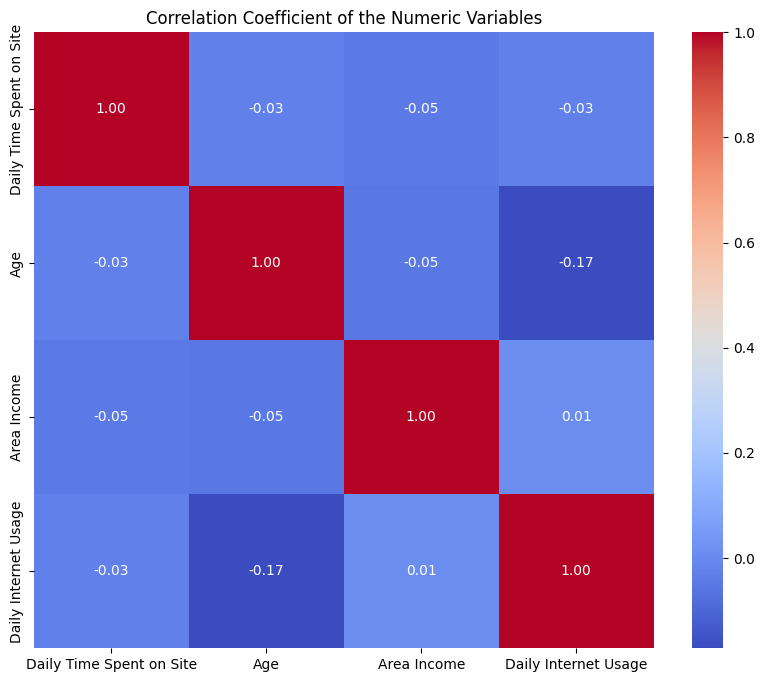

In [41]:
# Select only the numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Clicked on Ad'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cbar=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Coefficient of the Numeric Variables')
plt.show()

*There is no correlation between the independent variables.*

## Feature Engineering

In [42]:
# Checking basic info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Daily Time Spent on Site  50000 non-null  float64       
 1   Age                       50000 non-null  float64       
 2   Area Income               50000 non-null  float64       
 3   Daily Internet Usage      50000 non-null  float64       
 4   Ad Topic Line             50000 non-null  object        
 5   City                      50000 non-null  object        
 6   Gender                    50000 non-null  object        
 7   Country                   50000 non-null  object        
 8   Timestamp                 50000 non-null  datetime64[ns]
 9   Clicked on Ad             50000 non-null  int64         
 10  cleaned_ad_topic          50000 non-null  object        
 11  Hour                      50000 non-null  int32         
 12  Day of Week       

In [43]:
# Addressing categorical variables from the dataset
cv=df.describe(include=['object']).columns
print(f'Categorical variables are : {list(cv)}')

Categorical variables are : ['Ad Topic Line', 'City', 'Gender', 'Country', 'cleaned_ad_topic', 'Day Name']


In [44]:
df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

In [45]:
# Separating independant variables and dependant variable

# Creating the dataset with all dependent variables
dependent_variable = 'Clicked on Ad'

# Creating the dataset with all independent variables
independent_variables = list(set(df.columns.tolist()) - {dependent_variable})

# Create the data of independent variables
X = df[independent_variables].copy()
# Create the data of dependent variable
y = df[dependent_variable].copy()

### **Handling Imbalanced Data Check**

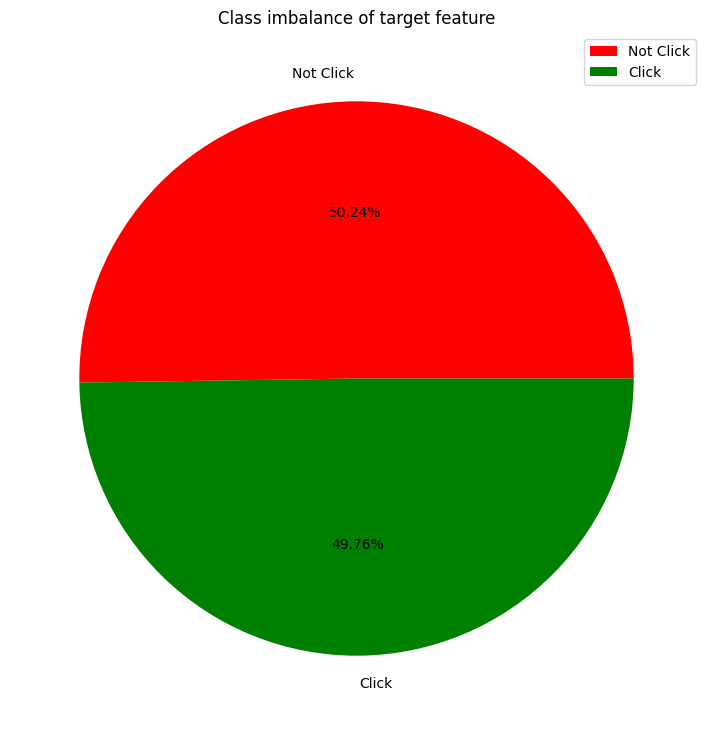

In [46]:
labels = ['Not Click', 'Click']
size = df['Clicked on Ad'].value_counts()
colors = ['red', 'green']
plt.figure(figsize=(9,9))
plt.pie(size, colors=colors, labels=labels,autopct='%.2f%%')
plt.axis('off')
plt.title("Class imbalance of target feature")
plt.legend()
plt.show()

*An imbalance of 50.24% and 49.76% in the target feature is very mild and hence not problematic.*

## Model Selection and Building

In [47]:
X.drop(columns = ['Ad Topic Line', 'City', 'Country','Timestamp','cleaned_ad_topic', 'Day Name'], inplace=True)

### **Data Splitting**

In [48]:
# Splitting dataset into training set and test set
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=42)

In [49]:
# Checking shape of split
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_train : {y_train.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (35000, 7)
Shape of X_test : (15000, 7)
Shape of y_train : (35000,)
Shape of y_test : (15000,)


### **Feature Scaling**

In [50]:
# Transforming data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Modeling**

In [51]:
def result_summarizer_for_train(y_train,y_train_pred):

    print('Training set evaluation result :\n')
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred)
    recall_train = recall_score(y_train, y_train_pred)
    f1_train = f1_score(y_train, y_train_pred)
    roc_auc_score_train=roc_auc_score(y_train, y_train_pred)

    print("Accuracy: ", accuracy_train*100)
    print("Precision: ", precision_train*100)
    print("Recall: ", recall_train*100)
    print("F1 Score: ", f1_train*100)
    print("roc_auc_score: ", roc_auc_score_train*100)

In [52]:
def result_summarizer_for_test(y_test,y_test_pred):

    print('Test set evaluation result :\n')
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred)
    recall_test = recall_score(y_test, y_test_pred)
    f1_test = f1_score(y_test, y_test_pred)
    roc_auc_score_test=roc_auc_score(y_test, y_test_pred)

    print("Accuracy: ", accuracy_test*100)
    print("Precision: ", precision_test*100)
    print("Recall: ", recall_test*100)
    print("F1 Score: ", f1_test*100)
    print("roc_auc_score: ", roc_auc_score_test*100)

In [53]:
def visualize(y_train, y_train_pred, y_test, y_test_pred):
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Confusion Matrix for Training Set
    cm_train = confusion_matrix(y_train, y_train_pred)
    ax1 = sns.heatmap(cm_train, annot=True, ax=axes[0], fmt='d', cmap='Blues')
    ax1.set_title('Confusion Matrix for Training Set')
    ax1.set_ylabel('True label')
    ax1.set_xlabel('Predicted label')

    # Confusion Matrix for Test Set
    cm_test = confusion_matrix(y_test, y_test_pred)
    ax2 = sns.heatmap(cm_test, annot=True, ax=axes[1], fmt='d', cmap='Blues')
    ax2.set_title('Confusion Matrix for Test Set')
    ax2.set_ylabel('True label')
    ax2.set_xlabel('Predicted label')

    plt.show()

In [54]:
def plot_roc_curve(y_test, y_pred,y_pred_prob):

    y_test = y_test.ravel()

    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

    # Calculate the Area Under the Curve (AUC)
    auc = roc_auc_score(y_test, y_pred_prob)
    # Plotting the ROC curve
    plt.figure(figsize=(5,5))
    plt.plot(fpr, tpr, label='ROC curve (AUC = %0.4f)' % auc)
    plt.plot([0, 1], [0, 1],'r--')
    # Labeling the graph
    plt.xlabel('False Positive Rate (Precision)')
    plt.ylabel('True Positive Rate (Recall)')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend(loc="lower right")
    # Show the plot
    plt.show()

### **<u> Logistic Regression </u>**

In [55]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)
print(model_lr)

y_train_pred_lr = model_lr.predict(X_train)
y_test_pred_lr = model_lr.predict(X_test)
y_pred_prob_lr = model_lr.predict_proba(X_test)

y_pred_prob_lr = y_pred_prob_lr[:, 1]

LogisticRegression()


In [56]:
result_summarizer_for_train(y_train,y_train_pred_lr)

Training set evaluation result :

Accuracy:  73.74000000000001
Precision:  74.8108108108108
Recall:  71.3688191141924
F1 Score:  73.0492918511568
roc_auc_score:  73.73364874328188


In [57]:
result_summarizer_for_test(y_test,y_test_pred_lr)

Test set evaluation result :

Accuracy:  73.69333333333333
Precision:  74.24474453570932
Recall:  71.78624310135953
F1 Score:  72.99479879551053
roc_auc_score:  73.67544885222513


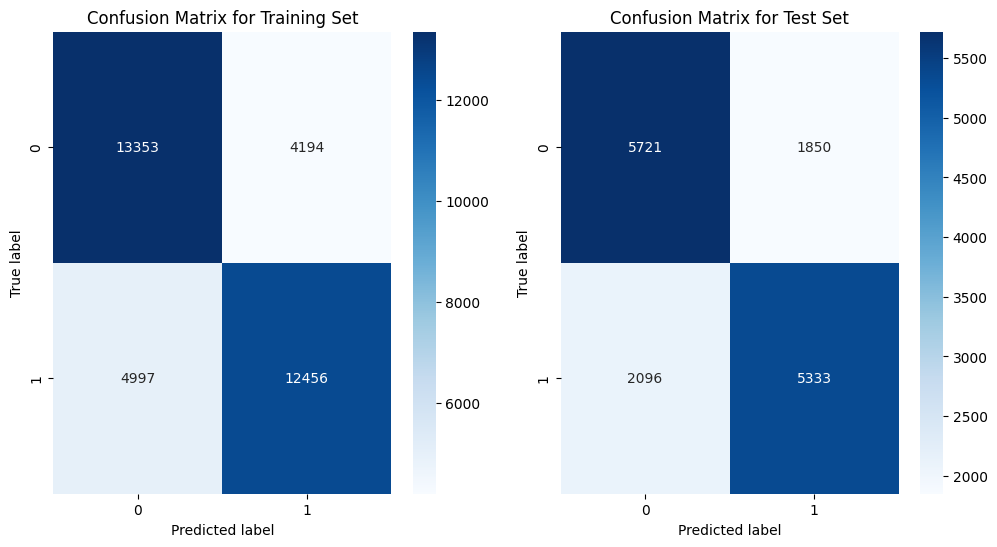

In [58]:
visualize(y_train, y_train_pred_lr, y_test, y_test_pred_lr)

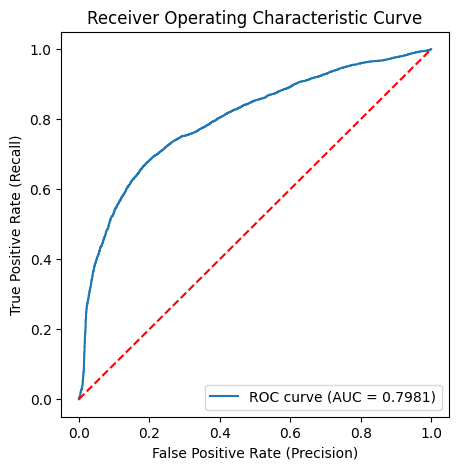

In [59]:
plot_roc_curve(y_test, y_test_pred_lr,y_pred_prob_lr)

#### Cross Validation & Hyperparameter Tuning

In [60]:
#Define hyperparameter grid for LogisticRegression
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2'],  # Penalty type (L1 or L2 regularization)
    'solver': ['liblinear', 'saga']
}

logistic_reg = LogisticRegression()
lr_grid = GridSearchCV(logistic_reg, param_grid, cv=5, n_jobs=-1)  # 10-fold cross-validation
lr_grid.fit(X_train, y_train)
print("Best Hyperparameters:", lr_grid.best_params_)
best_score= lr_grid.best_score_
print("Best Score:", best_score*100)

Best Hyperparameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 73.88


In [61]:
y_train_pred_lr_cv = lr_grid.predict(X_train)
y_test_pred_lr_cv = lr_grid.predict(X_test)
y_pred_prob_lr_cv = lr_grid.predict_proba(X_test)

y_pred_prob_lr_cv = y_pred_prob_lr_cv[:, 1]

In [62]:
result_summarizer_for_train(y_train,y_train_pred_lr_cv)

Training set evaluation result :

Accuracy:  73.79714285714286
Precision:  75.1091438273102
Recall:  70.97347160946542
F1 Score:  72.98276623950507
roc_auc_score:  73.78957959569414


In [63]:
result_summarizer_for_test(y_test,y_test_pred_lr_cv)

Test set evaluation result :

Accuracy:  73.74666666666667
Precision:  74.49824561403508
Recall:  71.44972405438148
F1 Score:  72.94214648893775
roc_auc_score:  73.72512619308692


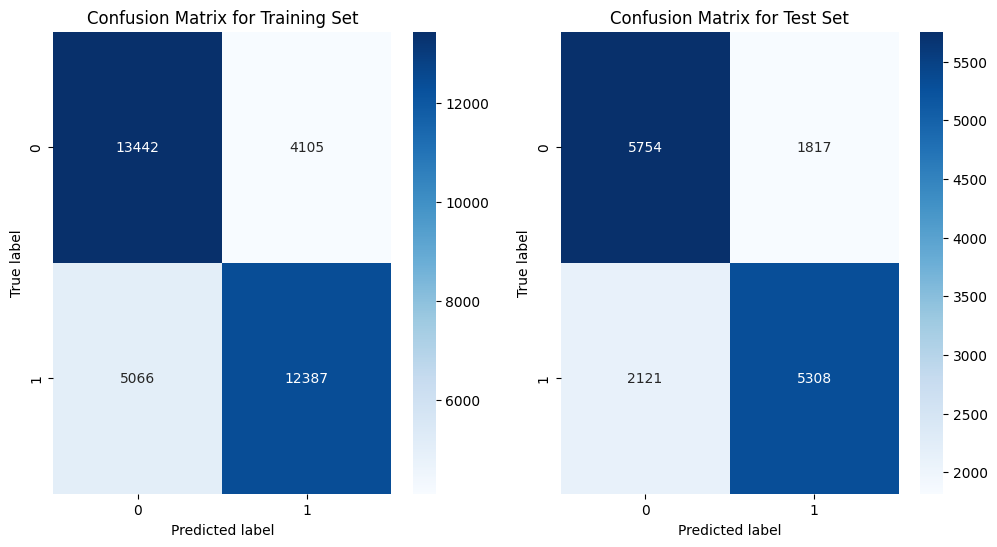

In [64]:
visualize(y_train, y_train_pred_lr_cv, y_test, y_test_pred_lr_cv)

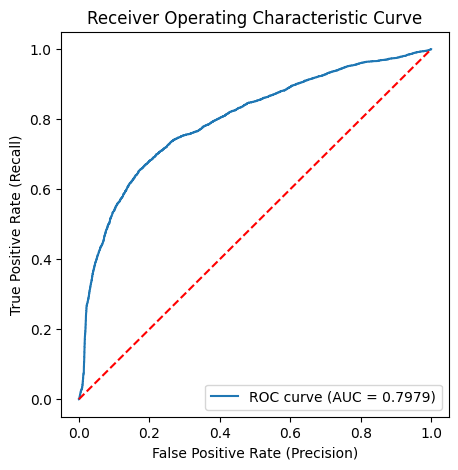

In [65]:
plot_roc_curve(y_test, y_test_pred_lr_cv,y_pred_prob_lr_cv)

*There's a very slight increase in the performance metrics after performing cross validation and hyperparameter tuning.*

### **<u>Naive Bayes</u>**

In [66]:
from sklearn.naive_bayes import GaussianNB

model_nb = GaussianNB()
model_nb.fit(X_train, y_train)
print(model_nb)

y_train_pred_nb = model_nb.predict(X_train)
y_test_pred_nb = model_nb.predict(X_test)
y_pred_prob_nb = model_nb.predict_proba(X_test)

y_pred_prob_nb = y_pred_prob_nb[:, 1]

GaussianNB()


In [67]:
result_summarizer_for_train(y_train,y_train_pred_nb)

Training set evaluation result :

Accuracy:  74.51142857142857
Precision:  79.00067980965329
Recall:  66.58454133959778
F1 Score:  72.26315953113827
roc_auc_score:  74.49019624112164


In [68]:
result_summarizer_for_test(y_test,y_test_pred_nb)

Test set evaluation result :

Accuracy:  74.50666666666666
Precision:  78.55219388563283
Recall:  66.75191815856778
F1 Score:  72.17290059671083
roc_auc_score:  74.43394349349602


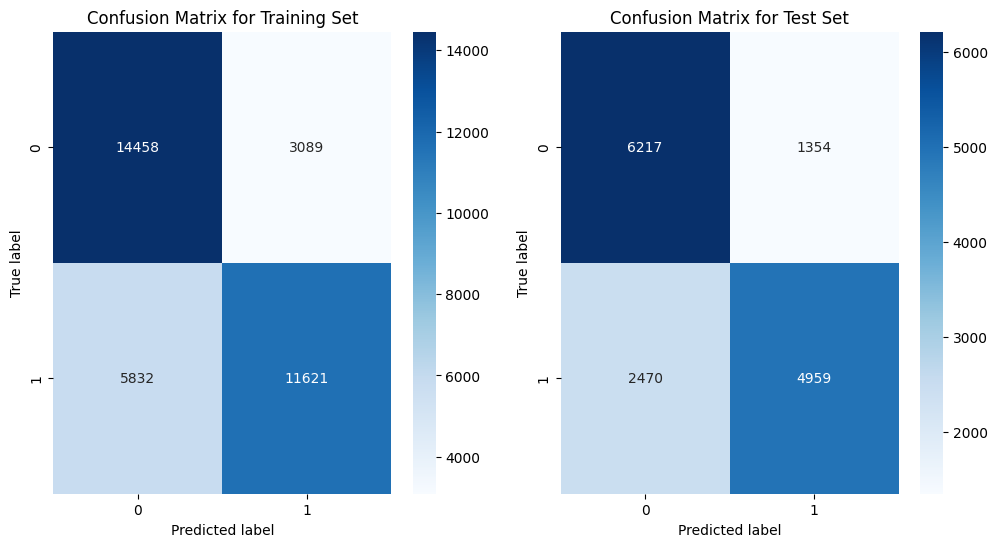

In [69]:
visualize(y_train, y_train_pred_nb, y_test, y_test_pred_nb)

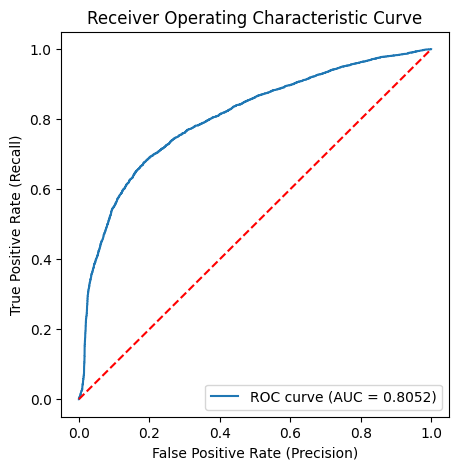

In [70]:
plot_roc_curve(y_test, y_test_pred_nb,y_pred_prob_nb)

#### Cross Validation & Hyperparameter Tuning

In [71]:
# Define hyperparameter grid for Gaussian Naive Bayes
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
}
gnb = GaussianNB()
gnb_grid = GridSearchCV(gnb, param_grid, cv=5, n_jobs=-1)  # 5-fold cross-validation
gnb_grid.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", gnb_grid.best_params_)
best_score = gnb_grid.best_score_
print("Best Score:", best_score * 100)

Best Hyperparameters: {'var_smoothing': 1e-09}
Best Score: 74.52000000000001


In [72]:
y_train_pred_gnb_cv = gnb_grid.predict(X_train)
y_test_pred_gnb_cv = gnb_grid.predict(X_test)
y_pred_prob_gnb_cv = gnb_grid.predict_proba(X_test)

y_pred_prob_gnb_cv = y_pred_prob_gnb_cv[:, 1]

In [73]:
result_summarizer_for_train(y_train,y_train_pred_gnb_cv)

Training set evaluation result :

Accuracy:  74.51142857142857
Precision:  79.00067980965329
Recall:  66.58454133959778
F1 Score:  72.26315953113827
roc_auc_score:  74.49019624112164


In [74]:
result_summarizer_for_test(y_test,y_test_pred_gnb_cv)

Test set evaluation result :

Accuracy:  74.50666666666666
Precision:  78.55219388563283
Recall:  66.75191815856778
F1 Score:  72.17290059671083
roc_auc_score:  74.43394349349602


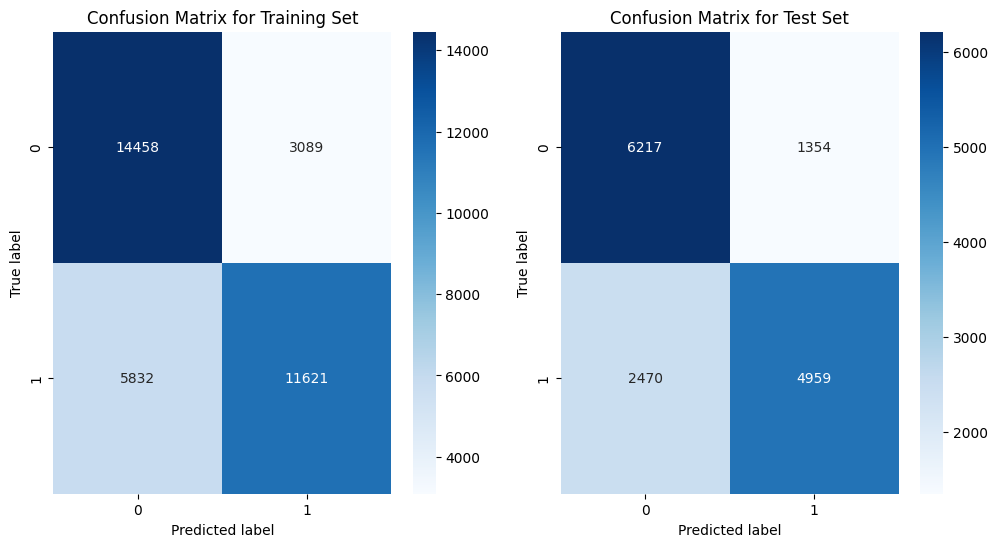

In [75]:
visualize(y_train, y_train_pred_gnb_cv, y_test, y_test_pred_gnb_cv)

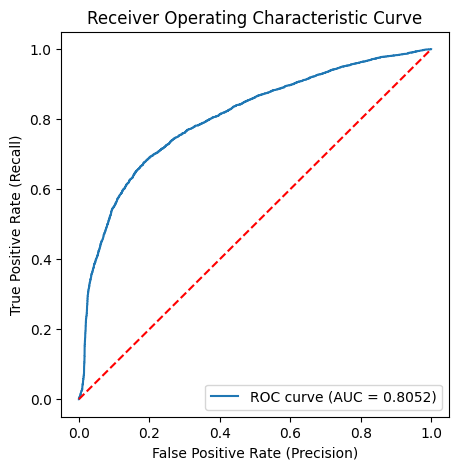

In [76]:
plot_roc_curve(y_test, y_test_pred_gnb_cv,y_pred_prob_gnb_cv)

*We saw no improvement in the model after training with cross-validation.*

### **<u>KNN**

In [77]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)
print(model_knn)

y_train_pred_knn = model_knn.predict(X_train)
y_test_pred_knn = model_knn.predict(X_test)
y_pred_prob_knn = model_knn.predict_proba(X_test)

y_pred_prob_knn = y_pred_prob_knn[:, 1]

KNeighborsClassifier()


In [78]:
result_summarizer_for_train(y_train,y_train_pred_knn)

Training set evaluation result :

Accuracy:  85.74285714285715
Precision:  85.94335813577896
Recall:  85.37214232510169
F1 Score:  85.65679793043978
roc_auc_score:  85.74186417560152


In [79]:
result_summarizer_for_test(y_test,y_test_pred_knn)

Test set evaluation result :

Accuracy:  80.2
Precision:  80.29623590161707
Recall:  79.53964194373401
F1 Score:  79.91614822829321
roc_auc_score:  80.19380723524041


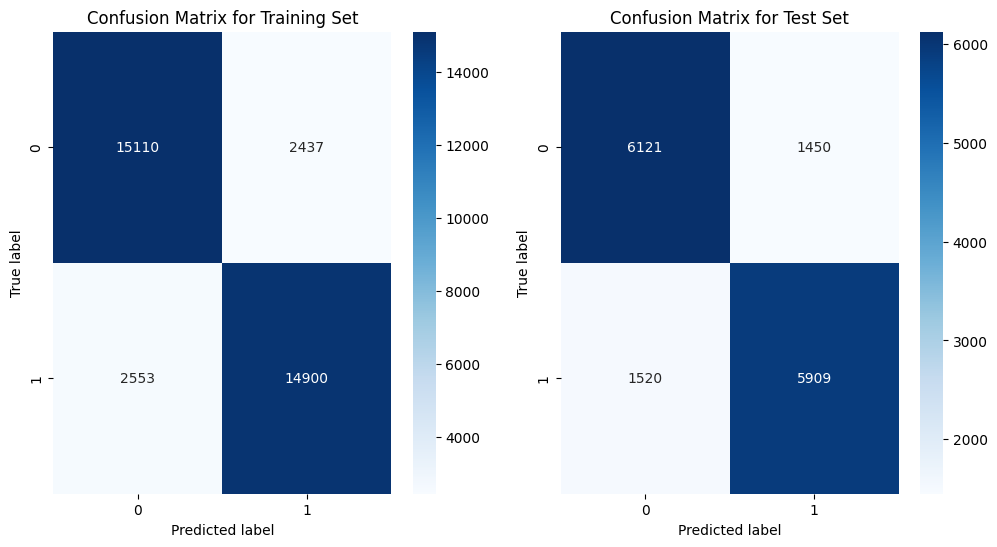

In [80]:
visualize(y_train, y_train_pred_knn, y_test, y_test_pred_knn)

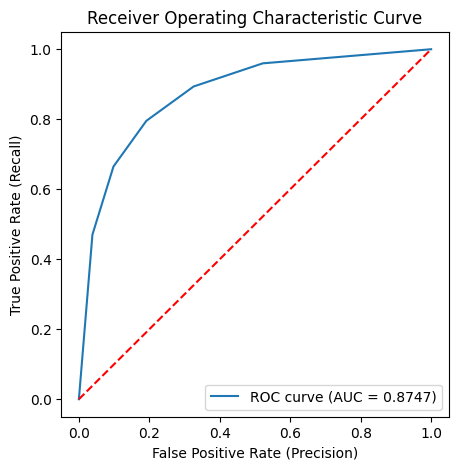

In [81]:
plot_roc_curve(y_test, y_test_pred_knn,y_pred_prob_knn)

#### Cross Validation & Hyperparameter Tuning

In [82]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric
}

knn = KNeighborsClassifier()
knn_grid = GridSearchCV(knn, param_grid, cv=5, n_jobs=-1)  # 5-fold cross-validation
knn_grid.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", knn_grid.best_params_)
best_score = knn_grid.best_score_
print("Best Score:", best_score * 100)

Best Hyperparameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'distance'}
Best Score: 82.35714285714283


In [83]:
y_train_pred_knn_cv = knn_grid.predict(X_train)
y_test_pred_knn_cv = knn_grid.predict(X_test)
y_pred_prob_knn_cv = knn_grid.predict_proba(X_test)

y_pred_prob_knn_cv = y_pred_prob_knn_cv[:, 1]

In [84]:
result_summarizer_for_train(y_train,y_train_pred_knn_cv)

Training set evaluation result :

Accuracy:  98.40857142857142
Precision:  99.00800556909154
Recall:  97.78834584312153
F1 Score:  98.3943962411
roc_auc_score:  98.40691014159837


In [85]:
result_summarizer_for_test(y_test,y_test_pred_knn_cv)

Test set evaluation result :

Accuracy:  83.36666666666666
Precision:  84.04637041126138
Recall:  81.97603984385516
F1 Score:  82.99829642248723
roc_auc_score:  83.35362552224458


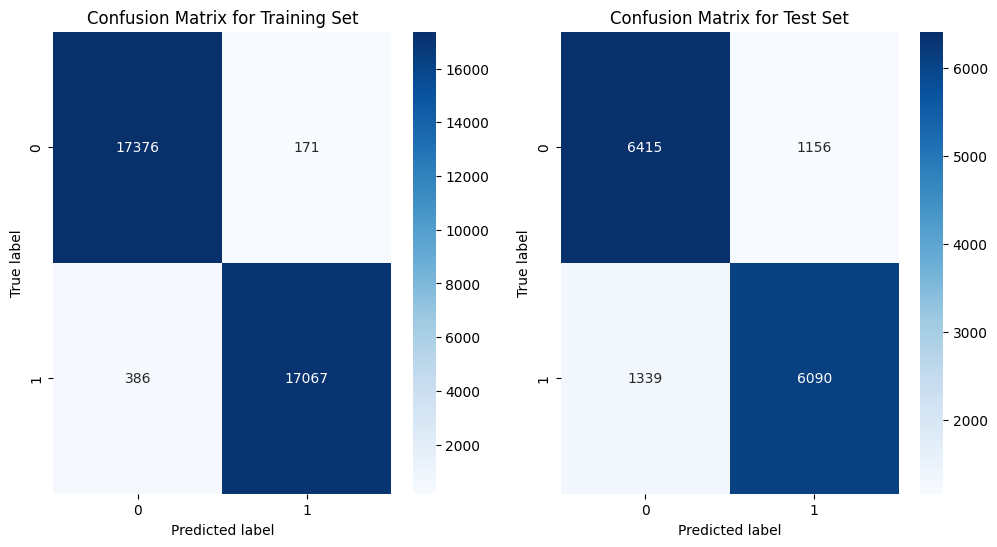

In [86]:
visualize(y_train, y_train_pred_knn_cv, y_test, y_test_pred_knn_cv)

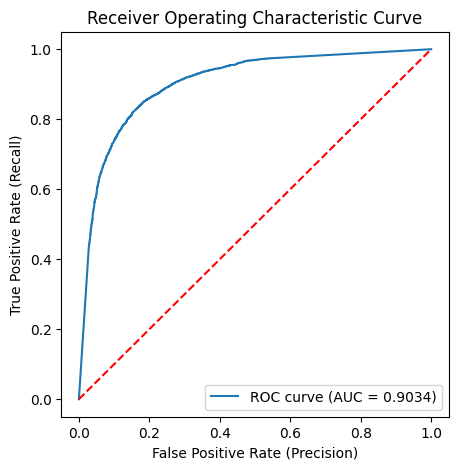

In [87]:
plot_roc_curve(y_test, y_test_pred_knn_cv,y_pred_prob_knn_cv)

* *There is around 3% difference in accuracy of score without and with cross validation for test.*

* *KNN failed to perform in test data as well as it is performing in train data.*

### **<u> Decision Tree </u>**

In [88]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
print(model_dt)

y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)
y_pred_prob_dt = model_dt.predict_proba(X_test)

y_pred_prob_dt = y_pred_prob_dt[:, 1]

DecisionTreeClassifier()


In [89]:
result_summarizer_for_train(y_train,y_train_pred_dt)

Training set evaluation result :

Accuracy:  98.40857142857142
Precision:  99.0364522869747
Recall:  97.75969747321376
F1 Score:  98.39393327758715
roc_auc_score:  98.406833406351


In [90]:
result_summarizer_for_test(y_test,y_test_pred_dt)

Test set evaluation result :

Accuracy:  82.63333333333334
Precision:  82.73615635179154
Recall:  82.05680441512989
F1 Score:  82.39508008380078
roc_auc_score:  82.62792670895182


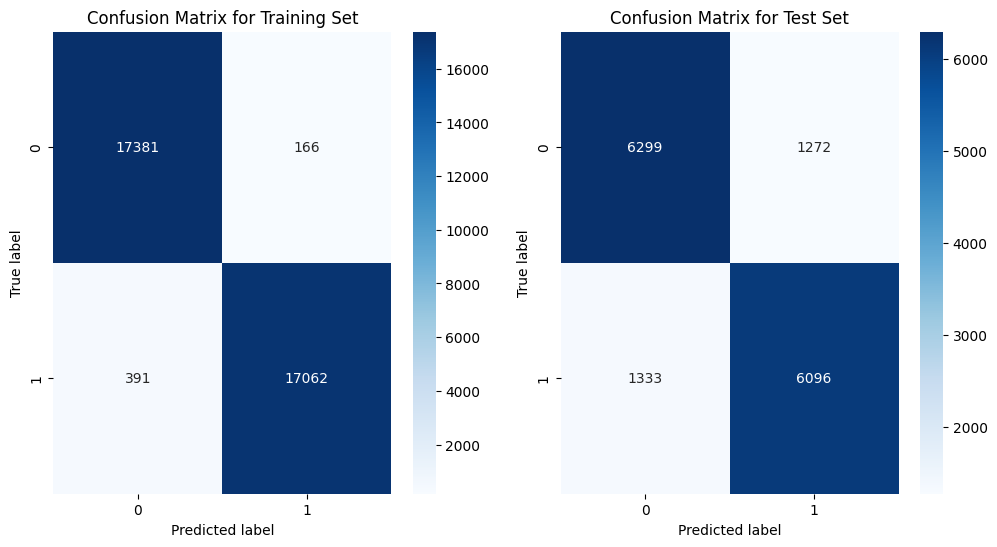

In [91]:
visualize(y_train, y_train_pred_dt, y_test, y_test_pred_dt)

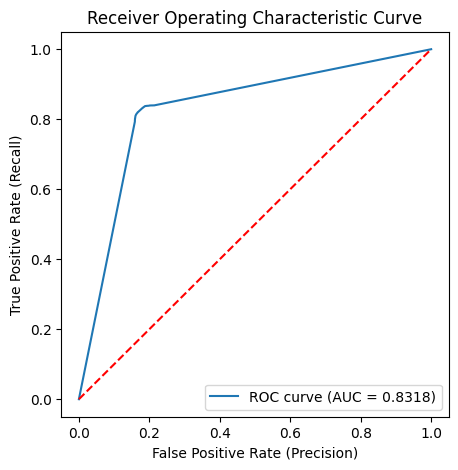

In [92]:
plot_roc_curve(y_test, y_test_pred_dt,y_pred_prob_dt)

#### Cross Validation & Hyperparameter Tuning

In [93]:
# Define hyperparameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 9, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

dt = DecisionTreeClassifier()

# Use GridSearchCV to find the best hyperparameters
dt_grid = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)  # 5-fold cross-validation
dt_grid.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", dt_grid.best_params_)
best_score = dt_grid.best_score_
print("Best Score:", best_score * 100)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 82.3857142857143


In [94]:
y_train_pred_dt_cv = dt_grid.predict(X_train)
y_test_pred_dt_cv = dt_grid.predict(X_test)
y_pred_prob_dt_cv = dt_grid.predict_proba(X_test)

y_pred_prob_dt_cv = y_pred_prob_dt_cv[:, 1]

In [95]:
result_summarizer_for_train(y_train,y_train_pred_dt_cv)

Training set evaluation result :

Accuracy:  91.2
Precision:  92.23129811365105
Recall:  89.92723314043431
F1 Score:  91.0646939367566
roc_auc_score:  91.19659086781789


In [96]:
result_summarizer_for_test(y_test,y_test_pred_dt_cv)

Test set evaluation result :

Accuracy:  83.74000000000001
Precision:  84.43279050510627
Recall:  82.35294117647058
F1 Score:  83.37989778534923
roc_auc_score:  83.72699231588025


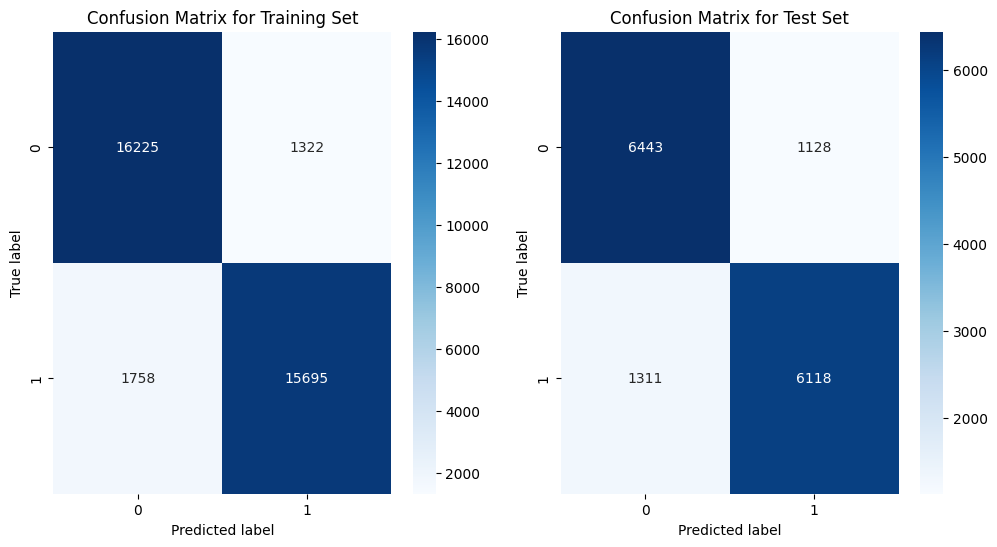

In [97]:
visualize(y_train, y_train_pred_dt_cv, y_test, y_test_pred_dt_cv)

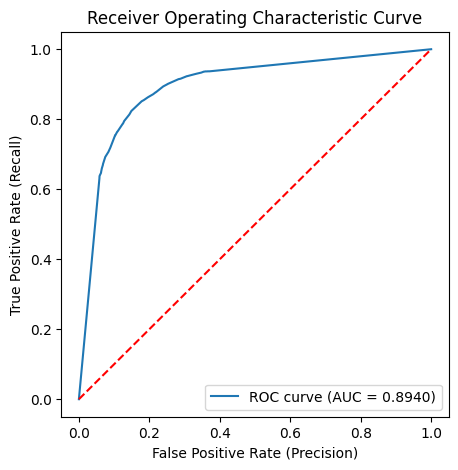

In [98]:
plot_roc_curve(y_test, y_test_pred_dt_cv,y_pred_prob_dt_cv)

*Only a 1% difference with a cross validation.*

### **<u> SVM </u>**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)
print(model_dt)

y_train_pred_dt = model_dt.predict(X_train)
y_test_pred_dt = model_dt.predict(X_test)
y_pred_prob_dt = model_dt.predict_proba(X_test)

y_pred_prob_dt = y_pred_prob_dt[:, 1]

DecisionTreeClassifier()


In [ ]:
result_summarizer_for_train(y_train,y_train_pred_dt)

Training set evaluation result :

Accuracy:  98.40857142857142
Precision:  99.0364522869747
Recall:  97.75969747321376
F1 Score:  98.39393327758715
roc_auc_score:  98.406833406351


In [ ]:
result_summarizer_for_test(y_test,y_test_pred_dt)

Test set evaluation result :

Accuracy:  82.63333333333334
Precision:  82.73615635179154
Recall:  82.05680441512989
F1 Score:  82.39508008380078
roc_auc_score:  82.62792670895182


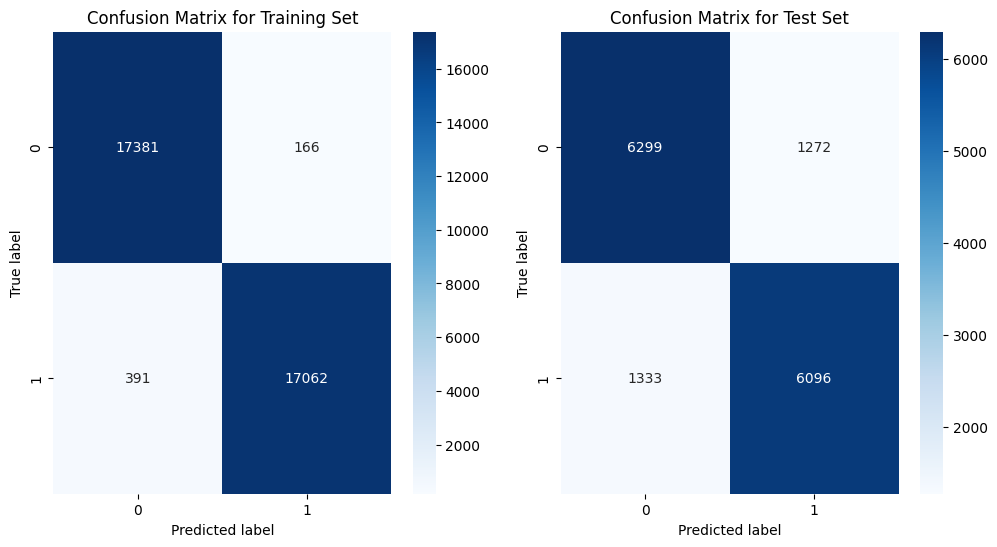

In [ ]:
visualize(y_train, y_train_pred_dt, y_test, y_test_pred_dt)

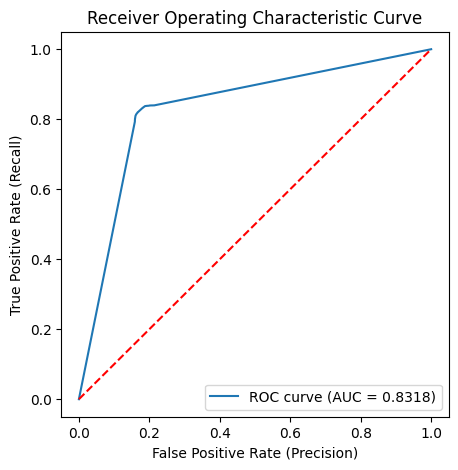

In [ ]:
plot_roc_curve(y_test, y_test_pred_dt,y_pred_prob_dt)

#### Cross Validation & Hyperparameter Tuning

In [ ]:
# Define hyperparameter grid for Decision Tree
param_grid = {
    'max_depth': [3, 5, 7, 9, None],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
}

dt = DecisionTreeClassifier()

# Use GridSearchCV to find the best hyperparameters
dt_grid = GridSearchCV(dt, param_grid, cv=5, n_jobs=-1)  # 5-fold cross-validation
dt_grid.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Best Hyperparameters:", dt_grid.best_params_)
best_score = dt_grid.best_score_
print("Best Score:", best_score * 100)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10}
Best Score: 82.3857142857143


In [ ]:
y_train_pred_dt_cv = dt_grid.predict(X_train)
y_test_pred_dt_cv = dt_grid.predict(X_test)
y_pred_prob_dt_cv = dt_grid.predict_proba(X_test)

y_pred_prob_dt_cv = y_pred_prob_dt_cv[:, 1]

In [ ]:
result_summarizer_for_train(y_train,y_train_pred_dt_cv)

Training set evaluation result :

Accuracy:  91.2
Precision:  92.23129811365105
Recall:  89.92723314043431
F1 Score:  91.0646939367566
roc_auc_score:  91.19659086781789


In [ ]:
result_summarizer_for_test(y_test,y_test_pred_dt_cv)

Test set evaluation result :

Accuracy:  83.74000000000001
Precision:  84.43279050510627
Recall:  82.35294117647058
F1 Score:  83.37989778534923
roc_auc_score:  83.72699231588025


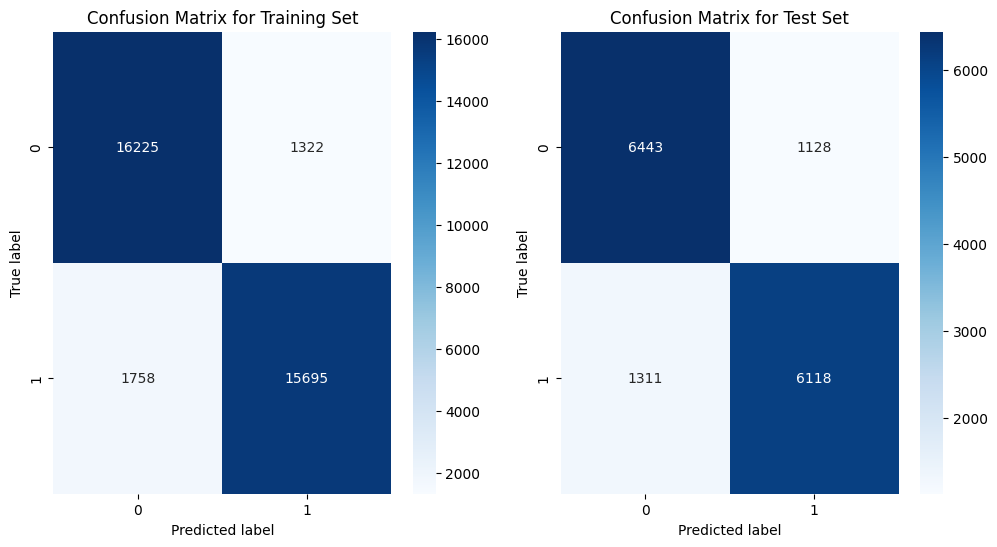

In [ ]:
visualize(y_train, y_train_pred_dt_cv, y_test, y_test_pred_dt_cv)

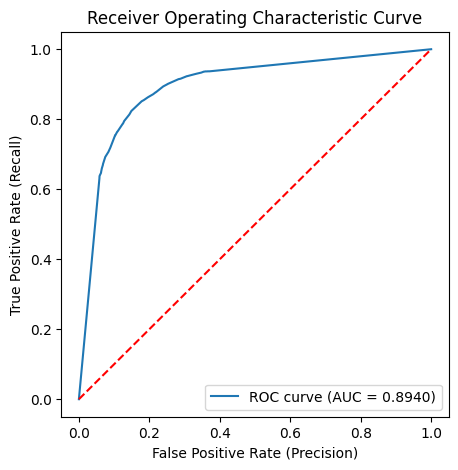

In [ ]:
plot_roc_curve(y_test, y_test_pred_dt_cv,y_pred_prob_dt_cv)

*Only a 1% difference with a cross validation.*

### **<u> Random Forest </u>**

In [99]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)
print(model_rf)

y_train_pred_rf = model_rf.predict(X_train)
y_test_pred_rf = model_rf.predict(X_test)
y_pred_prob_rf = model_rf.predict_proba(X_test)

y_pred_prob_rf = y_pred_prob_rf[:, 1]

RandomForestClassifier()


In [100]:
result_summarizer_for_train(y_train,y_train_pred_rf)

Training set evaluation result :

Accuracy:  98.40857142857142
Precision:  98.44592269755707
Recall:  98.36131324127658
F1 Score:  98.40359978217879
roc_auc_score:  98.40844484654586


In [101]:
result_summarizer_for_test(y_test,y_test_pred_rf)

Test set evaluation result :

Accuracy:  86.71333333333334
Precision:  86.79935012185214
Recall:  86.29694440705345
F1 Score:  86.54741815727304
roc_auc_score:  86.70942848407091


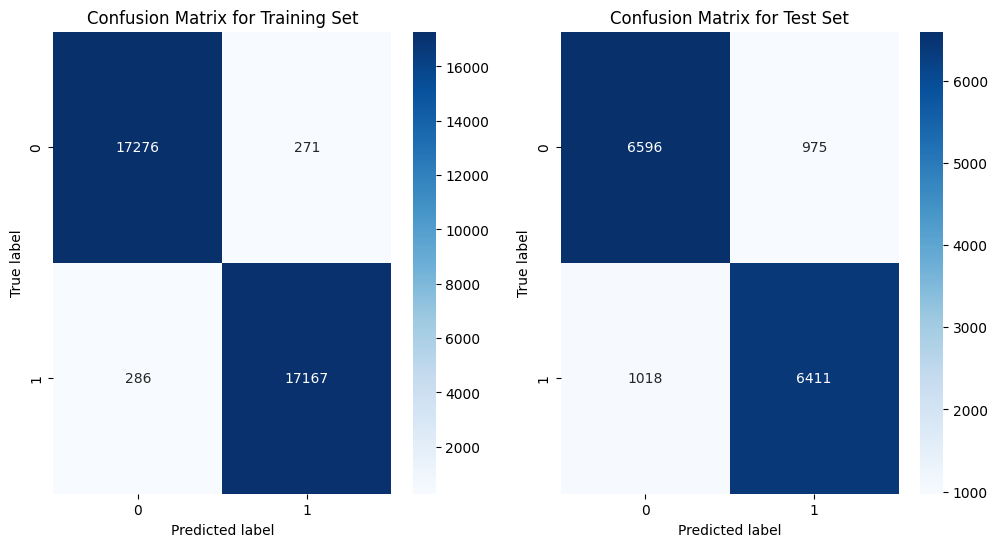

In [102]:
visualize(y_train, y_train_pred_rf, y_test, y_test_pred_rf)

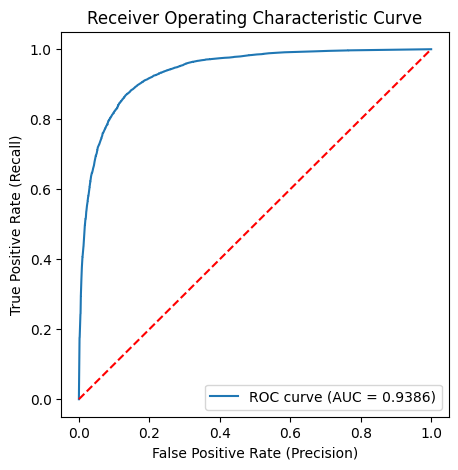

In [103]:
plot_roc_curve(y_test, y_test_pred_rf,y_pred_prob_rf)

#### Cross Validation & Hyperparameter Tuning

In [104]:
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of trees in the forest
    'max_depth': [3, 5, 7, 9, None],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],      # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]         # Minimum number of samples required to be at a leaf node
}

rf = RandomForestClassifier()
rf_random = RandomizedSearchCV(rf, param_grid, cv=5, n_jobs=-1)  # 5-fold cross-validation
rf_random.fit(X_train, y_train)

print("Best Hyperparameters:", rf_random.best_params_)
best_score = rf_random.best_score_
print("Best Score:", best_score * 100)

Best Hyperparameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_depth': None}
Best Score: 86.21714285714287


In [105]:
y_train_pred_rf_cv = rf_random.predict(X_train)
y_test_pred_rf_cv = rf_random.predict(X_test)
y_pred_prob_rf_cv = rf_random.predict_proba(X_test)

y_pred_prob_rf_cv = y_pred_prob_rf_cv[:, 1]

In [106]:
result_summarizer_for_train(y_train,y_train_pred_rf_cv)

Training set evaluation result :

Accuracy:  92.17142857142858
Precision:  92.1310348777275
Recall:  92.17326534120208
F1 Score:  92.1521452712379
roc_auc_score:  92.17143349125415


In [107]:
result_summarizer_for_test(y_test,y_test_pred_rf_cv)

Test set evaluation result :

Accuracy:  86.7
Precision:  87.13778020776381
Recall:  85.81235697940504
F1 Score:  86.46998982706002
roc_auc_score:  86.6916757820021


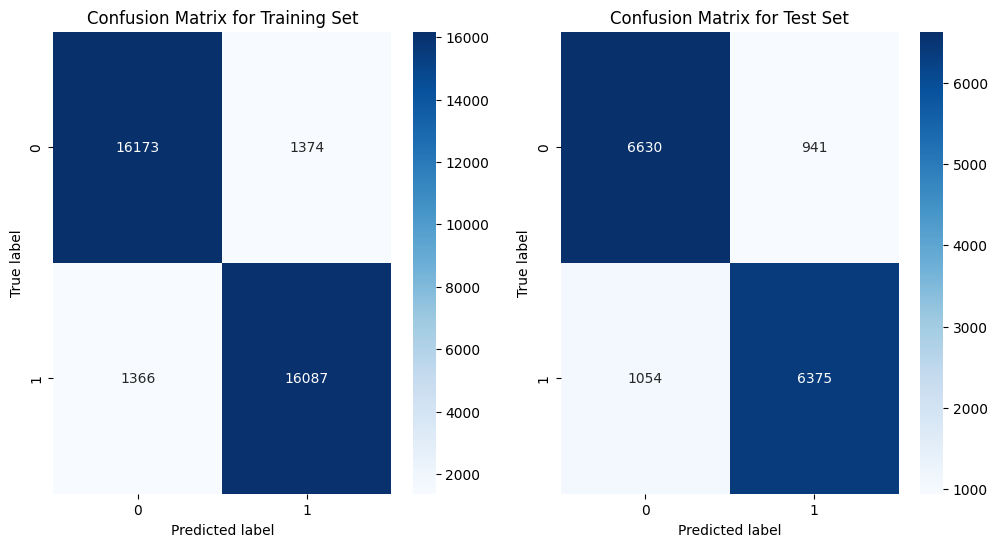

In [108]:
visualize(y_train, y_train_pred_rf_cv, y_test, y_test_pred_rf_cv)

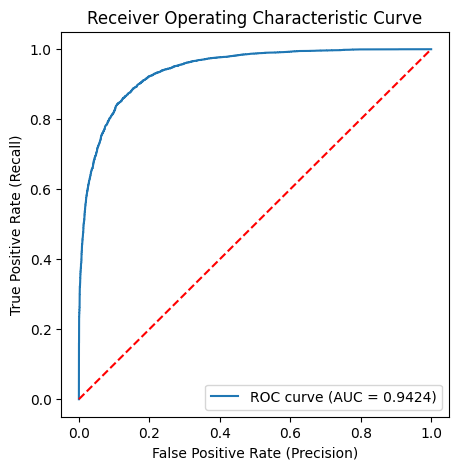

In [109]:
plot_roc_curve(y_test, y_test_pred_rf_cv,y_pred_prob_rf_cv)

* *We saw slightly improvement in the model after training with cross-validation.*
* *We got 86.56% of accuracy using train_test_split and 86.91% of accuracy using cross validation in Random Forest model.*

### **<u> GBM </u>**

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

model_gbm = GradientBoostingClassifier()
model_gbm.fit(X_train, y_train)
print(model_gbm)

y_train_pred_gbm = model_gbm.predict(X_train)
y_test_pred_gbm = model_gbm.predict(X_test)
y_pred_prob_gbm = model_gbm.predict_proba(X_test)

y_pred_prob_gbm = y_pred_prob_gbm[:, 1]

GradientBoostingClassifier()


In [111]:
result_summarizer_for_train(y_train,y_train_pred_gbm)

Training set evaluation result :

Accuracy:  81.73714285714286
Precision:  84.00245926836766
Recall:  78.2845356099238
F1 Score:  81.0427664748799
roc_auc_score:  81.72789497769799


In [112]:
result_summarizer_for_test(y_test,y_test_pred_gbm)

Test set evaluation result :

Accuracy:  81.47333333333333
Precision:  83.31900257953568
Recall:  78.26086956521739
F1 Score:  80.71076560005552
roc_auc_score:  81.44320720368913


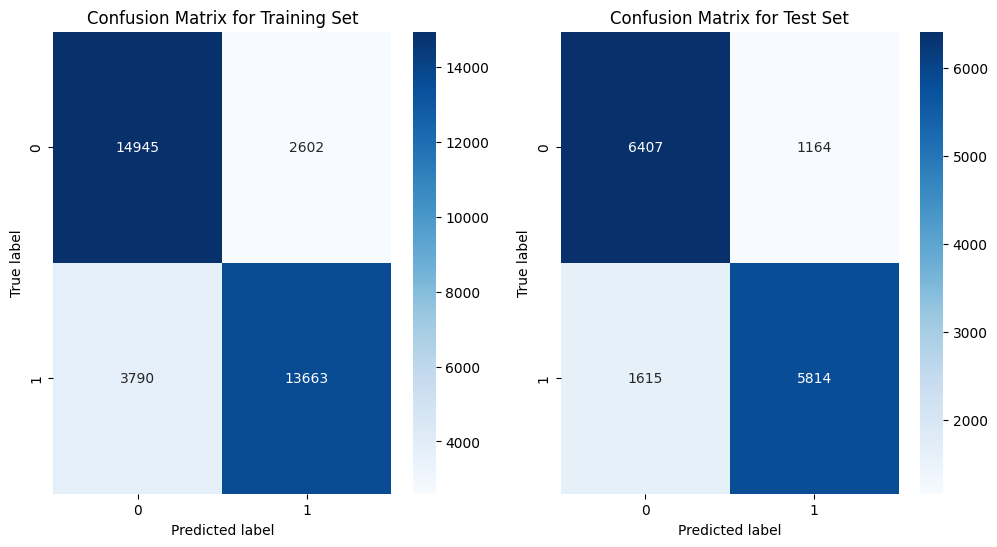

In [113]:
visualize(y_train, y_train_pred_gbm, y_test, y_test_pred_gbm)

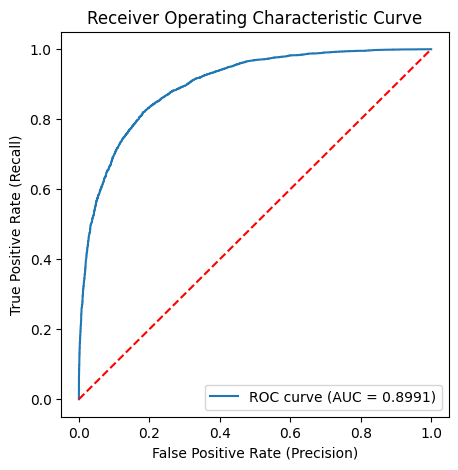

In [114]:
plot_roc_curve(y_test, y_test_pred_gbm,y_pred_prob_gbm)

#### Cross Validation & Hyperparameter Tuning

In [115]:
param_grid ={
    'n_estimators': [50,100, 200, 300, 400],          # Number of boosting stages
    'learning_rate': [0.01, 0.05, 0.1, 0.15,0.2],      # Learning rate
    'max_depth': [3, 4, 5, 6, 7, None],                  # Maximum depth of the individual trees
    'min_samples_split': [2, 5, 10, 15],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4, 6],              # Minimum number of samples required to be at a leaf node
    'subsample': [0.7, 0.8, 0.9, 1.0],             # Subsample ratio of the training instances
    'max_features': ['auto', 'sqrt', 'log2']       # Number of features to consider for best split
    }


gbm = GradientBoostingClassifier()
gbm_random = RandomizedSearchCV(gbm, param_grid, cv=5, n_jobs=-1)  # 5-fold cross-validation
gbm_random.fit(X_train, y_train)

print("Best Hyperparameters:", gbm_random.best_params_)
best_score = gbm_random.best_score_
print("Best Score:", best_score * 100)

Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 6, 'learning_rate': 0.15}
Best Score: 87.56857142857143


In [116]:
y_train_pred_gbm_cv = gbm_random.predict(X_train)
y_test_pred_gbm_cv = gbm_random.predict(X_test)
y_pred_prob_gbm_cv = gbm_random.predict_proba(X_test)

y_pred_prob_gbm_cv = y_pred_prob_gbm_cv[:, 1]

In [117]:
result_summarizer_for_train(y_train,y_train_pred_gbm_cv)

Training set evaluation result :

Accuracy:  90.28571428571428
Precision:  90.32887562417494
Recall:  90.17360912164098
F1 Score:  90.25117559353137
roc_auc_score:  90.28541400972912


In [118]:
result_summarizer_for_test(y_test,y_test_pred_gbm_cv)

Test set evaluation result :

Accuracy:  87.83999999999999
Precision:  87.86650452641534
Recall:  87.53533449993269
F1 Score:  87.7006068779501
roc_auc_score:  87.83714288066243


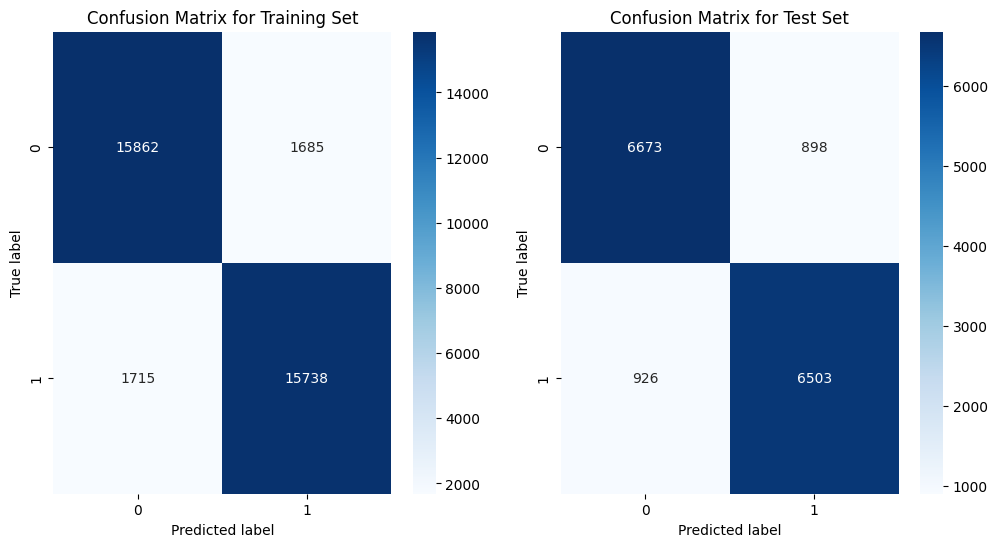

In [119]:
visualize(y_train, y_train_pred_gbm_cv, y_test, y_test_pred_gbm_cv)

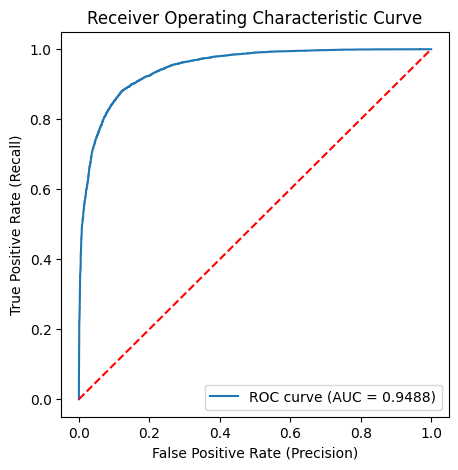

In [120]:
plot_roc_curve(y_test, y_test_pred_gbm_cv,y_pred_prob_gbm_cv)

* *We got 81.47% of accuracy using train_test_split and 88.58% of accuracy using cross validation in GBM model.*

### **<u> XGBoost </u>**

In [121]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
print(model_xgb)

y_train_pred_xgb = model_xgb.predict(X_train)
y_test_pred_xgb = model_xgb.predict(X_test)
y_pred_prob_xgb = model_xgb.predict_proba(X_test)

y_pred_prob_xgb = y_pred_prob_xgb[:, 1]

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [122]:
result_summarizer_for_train(y_train,y_train_pred_xgb)

Training set evaluation result :

Accuracy:  91.49428571428572
Precision:  91.47375658950263
Recall:  91.46851544147138
F1 Score:  91.47113594040968
roc_auc_score:  91.49421668808054


In [123]:
result_summarizer_for_test(y_test,y_test_pred_xgb)

Test set evaluation result :

Accuracy:  87.82
Precision:  87.68837459634014
Recall:  87.7237851662404
F1 Score:  87.70607630711258
roc_auc_score:  87.8190977079386


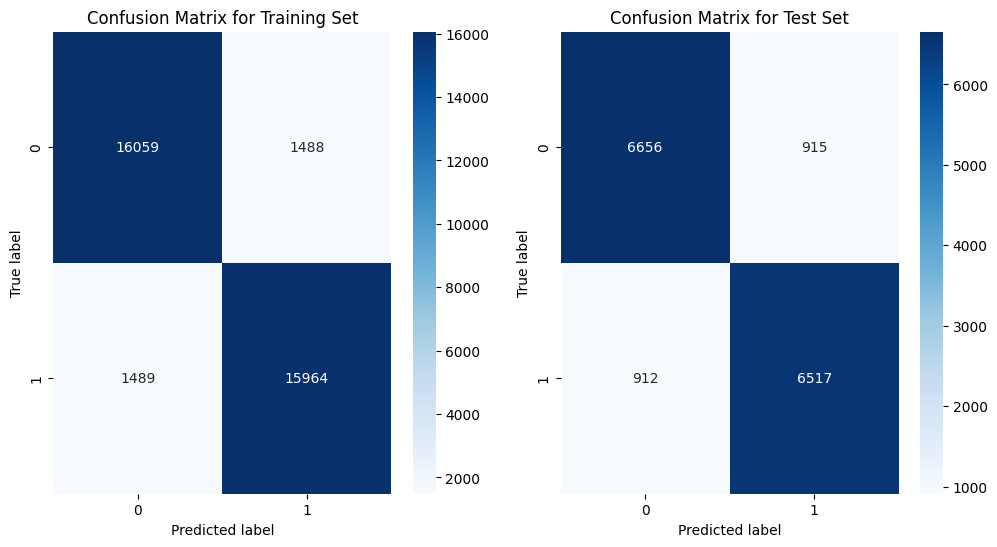

In [124]:
visualize(y_train, y_train_pred_xgb, y_test, y_test_pred_xgb)

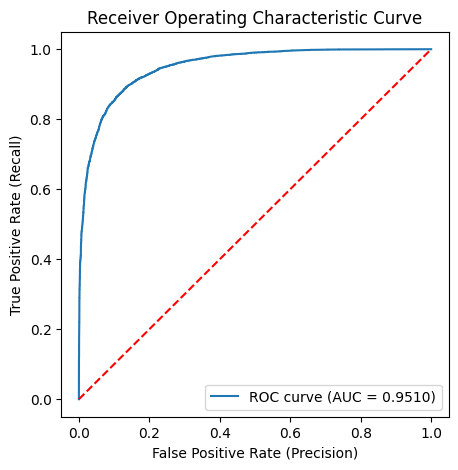

In [125]:
plot_roc_curve(y_test, y_test_pred_xgb,y_pred_prob_xgb)

#### Cross Validation & Hyperparameter Tuning

In [126]:
param_grid = {
    'n_estimators': [50, 100, 200],      # Number of boosting rounds
    'max_depth': [3, 5, 7, 9],           # Maximum depth of the trees
    'learning_rate': [0.01, 0.05, 0.1, 0.2],  # Learning rate
    'min_child_weight': [1, 3, 5],       # Minimum sum of instance weight (hessian) needed in a child
    'gamma': [0, 0.1, 0.2, 0.3],         # Minimum loss reduction required to make a further partition on a leaf node
    'subsample': [0.6, 0.8, 1.0],        # Subsample ratio of the training instances
    'colsample_bytree': [0.6, 0.8, 1.0]  # Subsample ratio of columns when constructing each tree
}

xgb = XGBClassifier()
xgb_random = RandomizedSearchCV(xgb, param_grid, cv=5, n_jobs=-1)  # 5-fold cross-validation
xgb_random.fit(X_train, y_train)

print("Best Hyperparameters:", xgb_random.best_params_)
best_score = xgb_random.best_score_
print("Best Score:", best_score * 100)

Best Hyperparameters: {'subsample': 1.0, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 9, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}
Best Score: 87.94571428571429


In [127]:
y_train_pred_xgb_cv = xgb_random.predict(X_train)
y_test_pred_xgb_cv = xgb_random.predict(X_test)
y_pred_prob_xgb_cv = xgb_random.predict_proba(X_test)

y_pred_prob_xgb_cv = y_pred_prob_xgb_cv[:, 1]

In [128]:
result_summarizer_for_train(y_train,y_train_pred_xgb_cv)

Training set evaluation result :

Accuracy:  94.27714285714286
Precision:  94.40676017475282
Recall:  94.09843579900303
F1 Score:  94.25234583488765
roc_auc_score:  94.27666418661612


In [129]:
result_summarizer_for_test(y_test,y_test_pred_xgb_cv)

Test set evaluation result :

Accuracy:  88.48
Precision:  88.40091607166913
Recall:  88.32951945080092
F1 Score:  88.36520333961757
roc_auc_score:  88.47858881006562


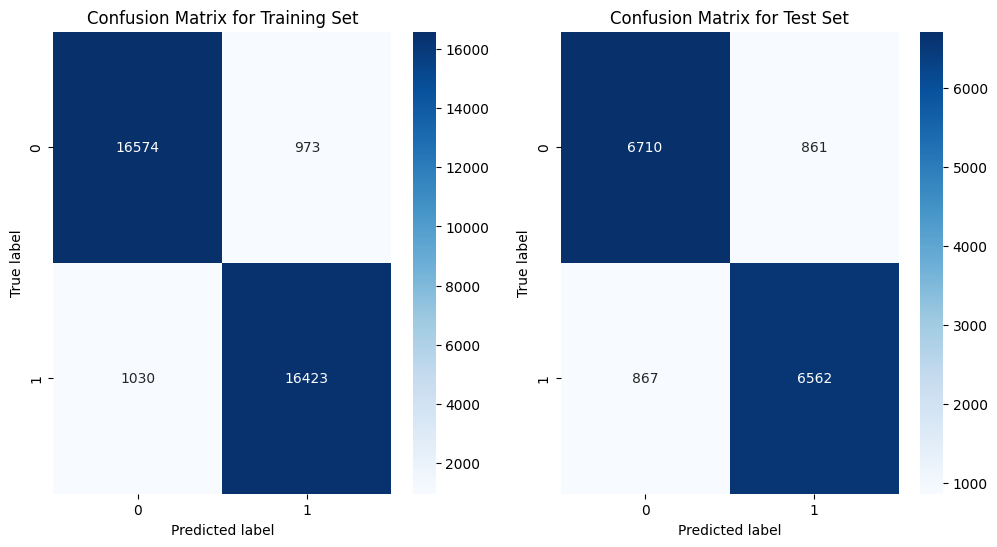

In [130]:
visualize(y_train, y_train_pred_xgb_cv, y_test, y_test_pred_xgb_cv)

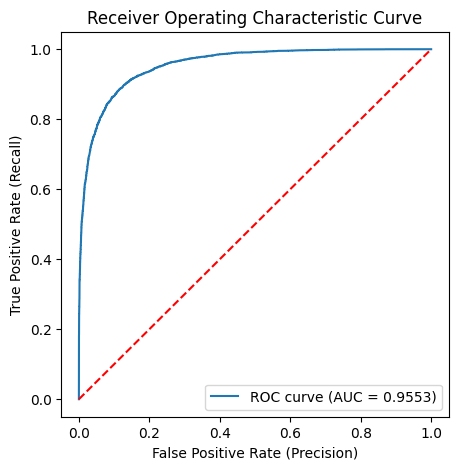

In [131]:
plot_roc_curve(y_test, y_test_pred_xgb_cv,y_pred_prob_xgb_cv)

* *We got 87.82% of accuracy using train_test_split and 88.62% of accuracy using cross validation in XGBoost model.*

### **<u>Comparing Models**

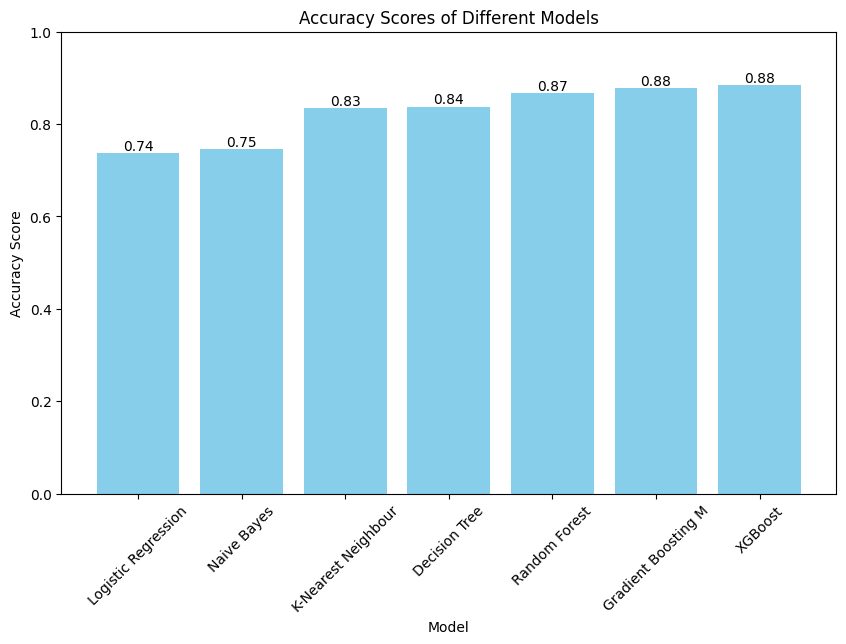

In [132]:
accuracy_lr = accuracy_score(y_test, y_test_pred_lr_cv)
accuracy_nb = accuracy_score(y_test, y_test_pred_gnb_cv)
accuracy_knn = accuracy_score(y_test, y_test_pred_knn_cv)
accuracy_dt = accuracy_score(y_test, y_test_pred_dt_cv)
accuracy_rf = accuracy_score(y_test, y_test_pred_rf_cv)
accuracy_gbm = accuracy_score(y_test, y_test_pred_gbm_cv)
accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb_cv)
#accuracy_lgbm = accuracy_score(y_test, y_test_pred_lgbm_cv)

model_names = ['Logistic Regression', 'Naive Bayes', 'K-Nearest Neighbour','Decision Tree','Random Forest','Gradient Boosting M', 'XGBoost']
accuracy_scores = [accuracy_lr,accuracy_nb,accuracy_knn,accuracy_dt,accuracy_rf,accuracy_gbm,accuracy_xgb]

plt.figure(figsize=(10, 6))
plt.bar(model_names, accuracy_scores, color='skyblue')
plt.title('Accuracy Scores of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.ylim(0, 1)  # Set the y-axis limits (0 to 1 for accuracy scores)

# Display the accuracy scores on top of the bars
for i, accuracy in enumerate(accuracy_scores):
    plt.text(i, accuracy, f'{accuracy:.2f}', ha='center', va='bottom')

plt.xticks(rotation=45)
plt.show()

In [133]:
y_test = y_test.ravel()

fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_prob_lr_cv)
fpr_nb, tpr_nb, thresholds_nb = roc_curve(y_test, y_pred_prob_gnb_cv)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn_cv)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt_cv)
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_pred_prob_rf_cv)
fpr_gbm, tpr_gbm, thresholds_gbm = roc_curve(y_test, y_pred_prob_gbm_cv)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, y_pred_prob_xgb_cv)

# Calculate the Area Under the Curve (AUC)
auc_lr = roc_auc_score(y_test, y_pred_prob_lr_cv)
auc_nb = roc_auc_score(y_test, y_pred_prob_gnb_cv)
auc_knn = roc_auc_score(y_test, y_pred_prob_knn_cv)
auc_dt = roc_auc_score(y_test, y_pred_prob_dt_cv)
auc_rf = roc_auc_score(y_test, y_pred_prob_rf_cv)
auc_gbm = roc_auc_score(y_test, y_pred_prob_gbm_cv)
auc_xgb = roc_auc_score(y_test, y_pred_prob_xgb_cv)

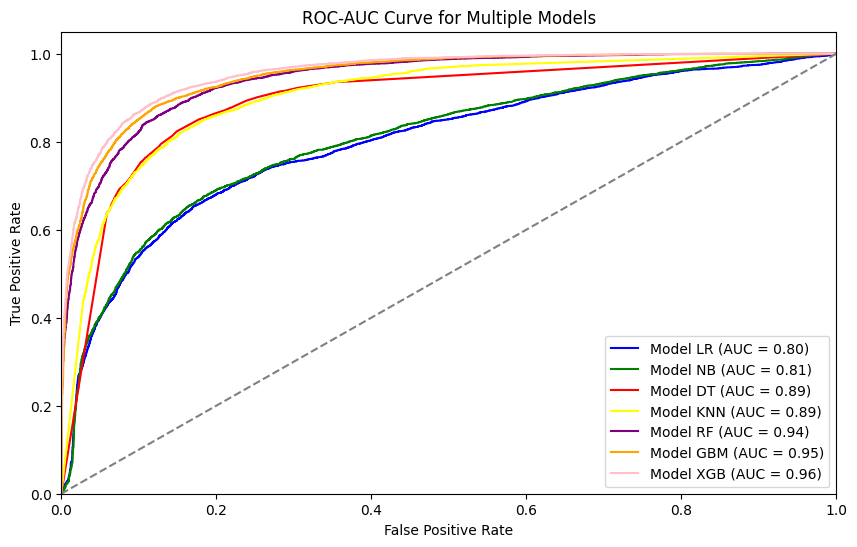

In [134]:
plt.figure(figsize=(10, 6))
plt.plot(fpr_lr, tpr_lr, label=f'Model LR (AUC = {auc_lr:.2f})', color='blue')
plt.plot(fpr_nb, tpr_nb, label=f'Model NB (AUC = {auc_nb:.2f})', color='green')
plt.plot(fpr_dt, tpr_dt, label=f'Model DT (AUC = {auc_dt:.2f})', color='red')
plt.plot(fpr_knn, tpr_knn, label=f'Model KNN (AUC = {auc_dt:.2f})', color='yellow')
plt.plot(fpr_rf, tpr_rf, label=f'Model RF (AUC = {auc_rf:.2f})', color='purple')
plt.plot(fpr_gbm, tpr_gbm, label=f'Model GBM (AUC = {auc_gbm:.2f})', color='orange')
plt.plot(fpr_xgb, tpr_xgb, label=f'Model XGB (AUC = {auc_xgb:.2f})', color='pink')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve for Multiple Models')
plt.legend()
plt.show()

* **Among all models, the XGBoost classification model has the highest accuracy, precision, recall, and F1-score. Also, XGBoost has a roc_auc_score of 0.89, which is very close to 1, which means the classifier is able to perfectly distinguish between classes.**

* **The XGBoost classification model trained using cross validation is the ideal model and well-trained for predicting whether the user will click on the ad or not.**


## Model Explainability and Feature Importance

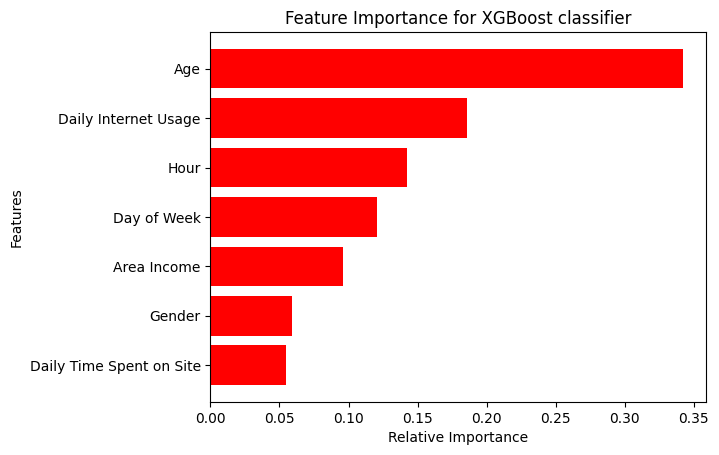

In [135]:
# Feature Importance for XGBoost classification model
features = X.columns
importances = xgb_random.best_estimator_.feature_importances_
indices = np.argsort(importances)

# Plot the graph for important feature
plt.title('Feature Importance for XGBoost classifier')
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.ylabel('Features')
plt.show()

In [137]:
# Import shap and other necessary libearies
import shap
import graphviz
from sklearn.tree import export_graphviz
sns.set_style('darkgrid')

ExactExplainer explainer: 15001it [26:31,  9.43it/s]


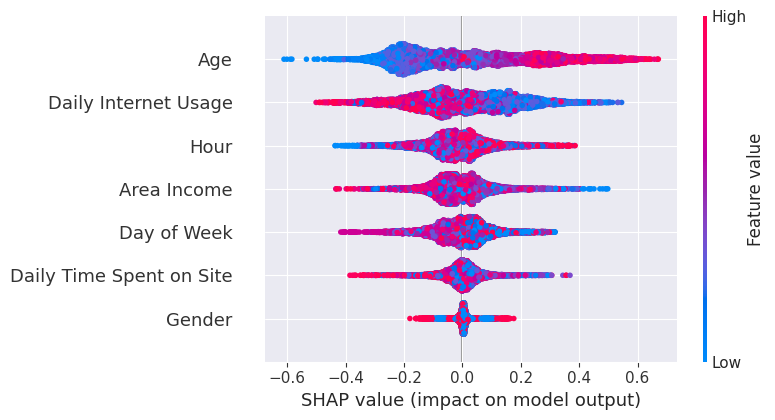

In [138]:
# Create a SHAP explainer object
explainer = shap.Explainer(xgb_random.predict, X_test)

# Calculate SHAP values
shap_values = explainer(X_test)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test, feature_names=X.columns)



*   Age appears to have a mixed impact, with both positive and negative SHAP values, indicating that different age groups may have varying effects on the model's output.
* Daily Internet Usage has a predominantly negative impact, suggesting that higher internet usage tends to decrease the model's output value.
* The Hour feature exhibits a complex pattern, with both positive and negative SHAP values, indicating that the impact of different hours varies.
* Area Income shows a predominantly positive impact, implying that higher area income is generally associated with an increase in the model's output.
* Day of Week and Daily Time Spent on Site have mixed impacts, with some days or time durations positively influencing the model's output, while others have a negative effect.
* Gender appears to have a relatively small impact, with a slight positive and negative SHAP value, suggesting that gender may not be a strong determinant for the model's output.


